# Load libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import matplotlib
import re
import os
import datetime
import importlib

<module 'logreg_binning' from '/Users/xulinchen/Documents/Dolplayground/logistic_regression/logreg_binning.py'>

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data_path = '/Users/xulinchen/Documents/Dolplayground/logistic_regression/data/home-credit-default-risk/'

In [6]:
df = pd.read_csv(data_path + 'application_train.csv')

In [23]:
df.shape

(307511, 122)

In [51]:
# sys.path.append('./utils')
importlib.reload(eda)
from utils import eda

In [53]:
from utils import logreg_binning

### Data Quality Review (Goal: Obtain descriptive statistics for useful features)
- Check target distribution
- Remove useless columns: ID, target, date, cols with only 1 value, duplicated columns
- Split columns by numeric and non-numeric
- Create descriptive statistics for both types of columns

In [47]:
# Target distribution
eda.check_target(df = df, target_col = 'TARGET', bad_value = 1, good_value = 0)

Number of missing value :  0
Number of value not good or bad :  0
Number of bads is :  24825
Number of goods is :  282686
bad rate is : 8.07%


In [48]:
# Feature distribution, get a list of numeric and a list of categorical features
num_cols, cat_cols = eda.get_num_cat_list(df = df, target_col = 'TARGET', id_col = 'SK_ID_CURR', date_col_keyword = 'DATE')

Start with 122 total columns
Removing taret column:  ['TARGET']
Removing ID columns:  ['SK_ID_CURR']
Removing date type columns:  []
Removing uniform value columns:  []
Removing duplicated columns:  []
Ended with 120 eligible columns
104 numeric columns
16 categorical or mixed type columns


In [49]:
num_col_summary = eda.describe_num_col(df = df, num_cols = num_cols)
num_col_summary

count           mean            std      min  \
CNT_CHILDREN                307511.0       0.417052       0.722121      0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279  25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996  45000.0   
AMT_ANNUITY                 307499.0   27108.573909   14493.737315   1615.5   
AMT_GOODS_PRICE             307233.0  538396.207429  369446.460540  40500.0   
...                              ...            ...            ...      ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757      0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685      0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002      0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474       0.794056      0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974       1.869295      0.0   

                                 25%       50%       75%          max  \
CNT_CHILDREN                     0.0       0.0       1.0         19.0   
AMT_INCOME_TOTAL            112500.0  147150.0  202500.0  117000000.0   
AMT_CREDIT                  270000.0  513531.0  808650.0    4050000.0   
AMT_ANNUITY                  16524.0   24903.0   34596.0     258025.5   
AMT_GOODS_PRICE             238500.0  450000.0  679500.0    4050000.0   
...                              ...       ...       ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY        0.0       0.0       0.0          9.0   
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       0.0          8.0   
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0       0.0         27.0   
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0       0.0        261.0   
AMT_REQ_CREDIT_BUREAU_YEAR       0.0       1.0       3.0         25.0   

                           N_missing_perc  N_unique  
CNT_CHILDREN                        0.00%        15  
AMT_INCOME_TOTAL                    0.00%      2548  
AMT_CREDIT                          0.00%      5603  
AMT_ANNUITY                         0.00%     13672  
AMT_GOODS_PRICE                     0.09%      1002  
...                                   ...       ...  
AMT_REQ_CREDIT_BUREAU_DAY          13.50%         9  
AMT_REQ_CREDIT_BUREAU_WEEK         13.50%         9  
AMT_REQ_CREDIT_BUREAU_MON          13.50%        24  
AMT_REQ_CREDIT_BUREAU_QRT          13.50%        11  
AMT_REQ_CREDIT_BUREAU_YEAR         13.50%        25  

[104 rows x 10 columns]

In [52]:
cat_col_summary = eda.describe_cat_col(df = df, cat_cols = cat_cols)
cat_col_summary

count unique                            top  \
NAME_CONTRACT_TYPE          307511      2                     Cash loans   
CODE_GENDER                 307511      3                              F   
FLAG_OWN_CAR                307511      2                              N   
FLAG_OWN_REALTY             307511      2                              Y   
NAME_TYPE_SUITE             306219      7                  Unaccompanied   
NAME_INCOME_TYPE            307511      8                        Working   
NAME_EDUCATION_TYPE         307511      5  Secondary / secondary special   
NAME_FAMILY_STATUS          307511      6                        Married   
NAME_HOUSING_TYPE           307511      6              House / apartment   
OCCUPATION_TYPE             211120     18                       Laborers   
WEEKDAY_APPR_PROCESS_START  307511      7                        TUESDAY   
ORGANIZATION_TYPE           307511     58         Business Entity Type 3   
FONDKAPREMONT_MODE           97216      4               reg oper account   
HOUSETYPE_MODE              153214      3                 block of flats   
WALLSMATERIAL_MODE          151170      7                          Panel   
EMERGENCYSTATE_MODE         161756      2                             No   

                              freq N_missing_perc  N_unique  
NAME_CONTRACT_TYPE          278232          0.00%         2  
CODE_GENDER                 202448          0.00%         3  
FLAG_OWN_CAR                202924          0.00%         2  
FLAG_OWN_REALTY             213312          0.00%         2  
NAME_TYPE_SUITE             248526          0.42%         7  
NAME_INCOME_TYPE            158774          0.00%         8  
NAME_EDUCATION_TYPE         218391          0.00%         5  
NAME_FAMILY_STATUS          196432          0.00%         6  
NAME_HOUSING_TYPE           272868          0.00%         6  
OCCUPATION_TYPE              55186         31.35%        18  
WEEKDAY_APPR_PROCESS_START   53901          0.00%         7  
ORGANIZATION_TYPE            67992          0.00%        58  
FONDKAPREMONT_MODE           73830         68.39%         4  
HOUSETYPE_MODE              150503         50.18%         3  
WALLSMATERIAL_MODE           66040         50.84%         7  
EMERGENCYSTATE_MODE         159428         47.40%         2

### Using woe and iv for data profiling
- To understand univariate relationship between x and y
- To guide data cleaning
- To build baseline logistic regression model

In [79]:
pd.options.display.float_format = '{:,.6f}'.format
np.set_printoptions(precision=6, suppress=True)

In [55]:
#If any feature has special value that's meant to be treated as categorical bins, list it here
special_values_list = [[] for _ in range(len(num_cols))]
special_values_dict = dict(zip(num_cols, special_values_list))
special_values_dict

{'CNT_CHILDREN': [],
 'AMT_INCOME_TOTAL': [],
 'AMT_CREDIT': [],
 'AMT_ANNUITY': [],
 'AMT_GOODS_PRICE': [],
 'REGION_POPULATION_RELATIVE': [],
 'DAYS_BIRTH': [],
 'DAYS_EMPLOYED': [],
 'DAYS_REGISTRATION': [],
 'DAYS_ID_PUBLISH': [],
 'OWN_CAR_AGE': [],
 'FLAG_MOBIL': [],
 'FLAG_EMP_PHONE': [],
 'FLAG_WORK_PHONE': [],
 'FLAG_CONT_MOBILE': [],
 'FLAG_PHONE': [],
 'FLAG_EMAIL': [],
 'CNT_FAM_MEMBERS': [],
 'REGION_RATING_CLIENT': [],
 'REGION_RATING_CLIENT_W_CITY': [],
 'HOUR_APPR_PROCESS_START': [],
 'REG_REGION_NOT_LIVE_REGION': [],
 'REG_REGION_NOT_WORK_REGION': [],
 'LIVE_REGION_NOT_WORK_REGION': [],
 'REG_CITY_NOT_LIVE_CITY': [],
 'REG_CITY_NOT_WORK_CITY': [],
 'LIVE_CITY_NOT_WORK_CITY': [],
 'EXT_SOURCE_1': [],
 'EXT_SOURCE_2': [],
 'EXT_SOURCE_3': [],
 'APARTMENTS_AVG': [],
 'BASEMENTAREA_AVG': [],
 'YEARS_BEGINEXPLUATATION_AVG': [],
 'YEARS_BUILD_AVG': [],
 'COMMONAREA_AVG': [],
 'ELEVATORS_AVG': [],
 'ENTRANCES_AVG': [],
 'FLOORSMAX_AVG': [],
 'FLOORSMIN_AVG': [],
 'LANDAREA_AV

#### Numeric feature binning
- Missing value in numeric features is treated as a separate group
- Coarse class: 0 bad will be grouped with nearby bins based on woe distance
- Coarse class: monotonicity is forced through iterations until it's reached

In [233]:
from utils import constants

In [54]:
from utils.logreg_binning import *

In [223]:
from utils import logreg_binning_refactor

In [250]:
importlib.reload(logreg_binning_refactor)
from utils.logreg_binning_refactor import *

In [242]:
# Global initialisation
target_col = 'TARGET'
fineclass_summary = pd.DataFrame()
coarseclass_summary = pd.DataFrame()
df_woe = pd.DataFrame()
woe_dict_all = {}
cols_to_check =[]

# Loop through feature cols

# def num_get_woe(df, feat = 'CNT_CHILDREN', num_bin = NUM_BINS):
# '''Given df[feat] and number of bins to make, Get a Series of woe'''
# get bin cut off -> make bin / get bin label -> get woe, iv and report

feat_col = 'CNT_CHILDREN'
raw_feat = df[feat_col]
target = df[target_col]

#Local Initialisation
eval_df_summary_fc = pd.DataFrame()
eval_df_summary_cc = pd.DataFrame()

feat_fc, bin_cut_offs_fc = num_make_fc_bin(raw_feat, num_bin = constants.NUM_BINS)

In [229]:
bin_label_dict = num_get_bin_label(bin_cut_offs = bin_cut_offs_fc)

{0: '1. [0.0, 1.0]', 1: '2. (1.0, 2.0]', 2: '3. (2.0, 19.0]'}

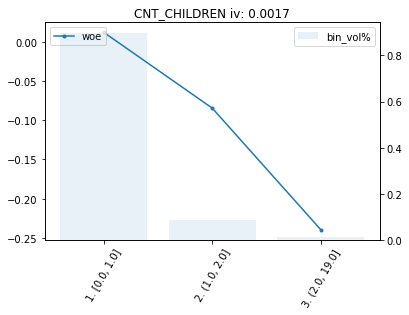

In [251]:
attr_woe_iv, feat_iv = calc_woe_iv(target, feat_input = feat_fc, bin_label_dict = bin_label_dict, \
                                   feat_col = 'CNT_CHILDREN', desc = '0.Fineclass')

In [246]:
attr_woe_iv

feat         N_good         N_bad        N_count  dist_good  dist_bad  \
0     0 254,427.000000 22,063.000000 276,490.000000   0.900034  0.888741   
1     1  24,416.000000  2,333.000000  26,749.000000   0.086371  0.093978   
2     2   3,843.000000    429.000000   4,272.000000   0.013595  0.017281   

   bin_count_perc       woe  logodds    p_bad       iv           var  \
0        0.899122  0.012626 2.445112 0.079797 0.000143  CNT_CHILDREN   
1        0.086986 -0.084402 2.348084 0.087218 0.000642  CNT_CHILDREN   
2        0.013892 -0.239934 2.192552 0.100421 0.000884  CNT_CHILDREN   

        bin_label         desc  
0   1. [0.0, 1.0]  0.Fineclass  
1   2. (1.0, 2.0]  0.Fineclass  
2  3. (2.0, 19.0]  0.Fineclass

In [247]:
feat_iv

var         desc       iv
0  CNT_CHILDREN  0.Fineclass 0.001669

In [171]:
# def num_make_bin(df, feat = 'CNT_CHILDREN', bins_fc = bins_fc):
# '''Given a list of bin cut offs, return a Series of bin number'''
s_bin_number = pd.cut(df[feat], bins = bin_cut_offs_fc, labels=False, include_lowest = True)
assert s_bin_number.isnull().sum()==0, 'Check the values in the input Series. Some value is outside of the range of bin cut offs, and it is not mapped to a bin'

In [131]:
eval_df_summary_fc = bin_woe_iv(feat_fc, df[target], '0.Fineclass')
eval_df_summary_fc

AttributeError: 'int' object has no attribute 'split'

num of bins is  6
0.Fineclass
IV is 0.17877518670933576


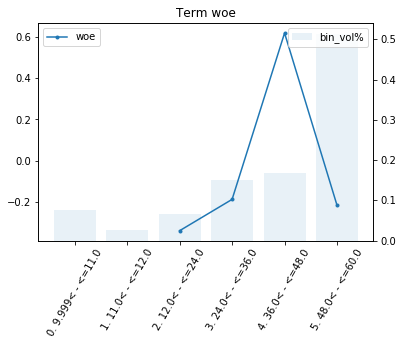

1. Coarseclass Group 0 Bad bins
IV is 0.2549250930436984


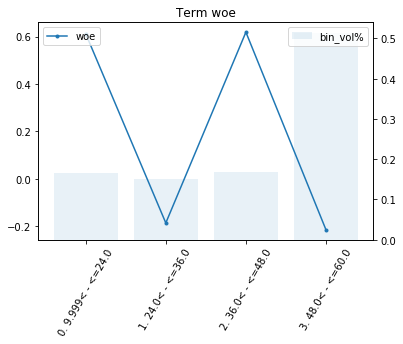

feature and target correlation is 0.02872191271803601, woe should decrease as feature increase
input bin edges :  [ 9.999 24.    36.    48.    60.   ] 
 dropping index [1]
output bin edges :  [ 9.999 36.    48.    60.   ]
2. Coarseclass Group non-mono bins round 1
IV is 0.16369378202907336


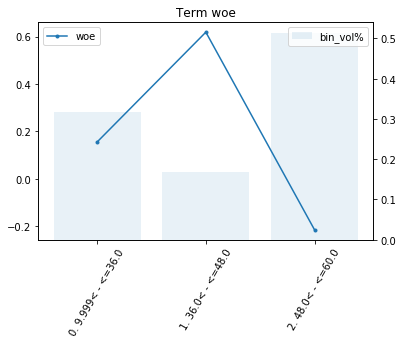

feature and target correlation is 0.02872191271803601, woe should decrease as feature increase
input bin edges :  [ 9.999 36.    48.    60.   ] 
 dropping index [1]
output bin edges :  [ 9.999 48.    60.   ]
2. Coarseclass Group non-mono bins round 2
IV is 0.12554204380056408


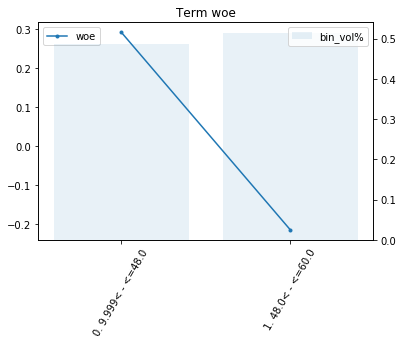

feature and target correlation is 0.02872191271803601, woe should decrease as feature increase
input bin edges :  [ 9.999 48.    60.   ] 
 dropping index []
output bin edges :  [ 9.999 48.    60.   ]
woe encoding {'0. 9.999< - <=48.0': 0.29241943675265875, '1. 48.0< - <=60.0': -0.21578838447125306}
num of bins is  17
0.Fineclass
IV is 0.5440538204199906


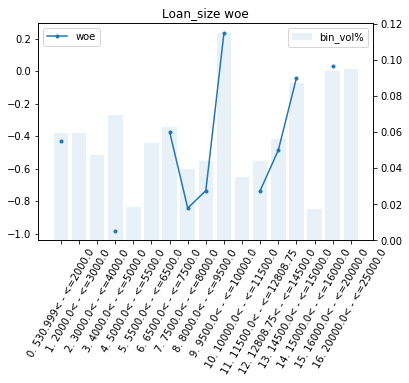

1. Coarseclass Group 0 Bad bins
IV is 0.46360915274409653


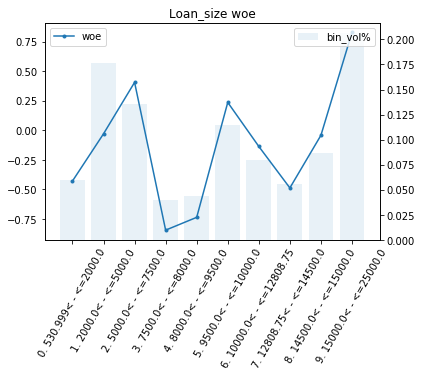

feature and target correlation is -0.022227404098778946, woe should increase as feature increase
input bin edges :  [  530.999  2000.     5000.     7500.     8000.     9500.    10000.
 12808.75  14500.    15000.    25000.   ] 
 dropping index [2 6 7]
output bin edges :  [  530.999  2000.     7500.     8000.     9500.    14500.    15000.
 25000.   ]
2. Coarseclass Group non-mono bins round 1
IV is 0.3927003467619584


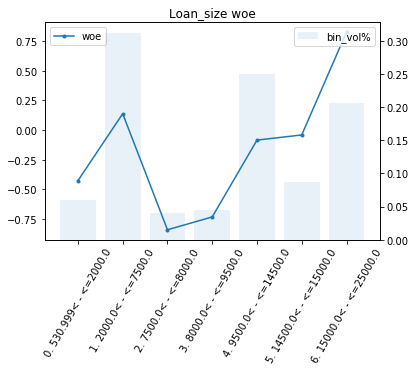

feature and target correlation is -0.022227404098778946, woe should increase as feature increase
input bin edges :  [  530.999  2000.     7500.     8000.     9500.    14500.    15000.
 25000.   ] 
 dropping index [1]
output bin edges :  [  530.999  7500.     8000.     9500.    14500.    15000.    25000.   ]
2. Coarseclass Group non-mono bins round 2
IV is 0.3549054117687106


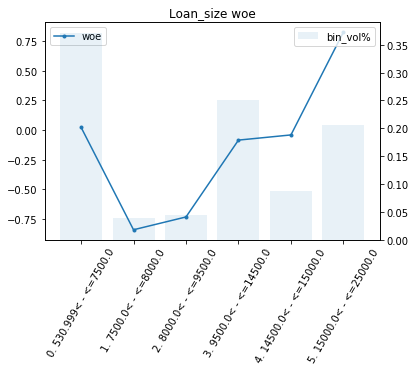

feature and target correlation is -0.022227404098778946, woe should increase as feature increase
input bin edges :  [  530.999  7500.     8000.     9500.    14500.    15000.    25000.   ] 
 dropping index [1]
output bin edges :  [  530.999  8000.     9500.    14500.    15000.    25000.   ]
2. Coarseclass Group non-mono bins round 3
IV is 0.27581809651739564


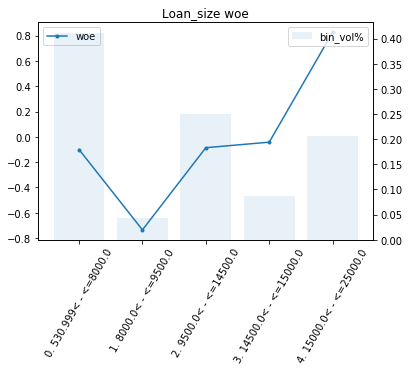

feature and target correlation is -0.022227404098778946, woe should increase as feature increase
input bin edges :  [  530.999  8000.     9500.    14500.    15000.    25000.   ] 
 dropping index [1]
output bin edges :  [  530.999  9500.    14500.    15000.    25000.   ]
2. Coarseclass Group non-mono bins round 4
IV is 0.23049807305484687


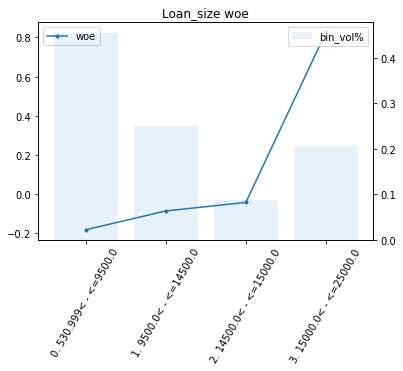

feature and target correlation is -0.022227404098778946, woe should increase as feature increase
input bin edges :  [  530.999  9500.    14500.    15000.    25000.   ] 
 dropping index []
output bin edges :  [  530.999  9500.    14500.    15000.    25000.   ]
woe encoding {'0. 530.999< - <=9500.0': -0.18187472926194473, '1. 9500.0< - <=14500.0': -0.0858946822895545, '2. 14500.0< - <=15000.0': -0.0422196187868931, '3. 15000.0< - <=25000.0': 0.8268182282367165}
num of bins is  14
0.Fineclass
IV is 1.675493075267305


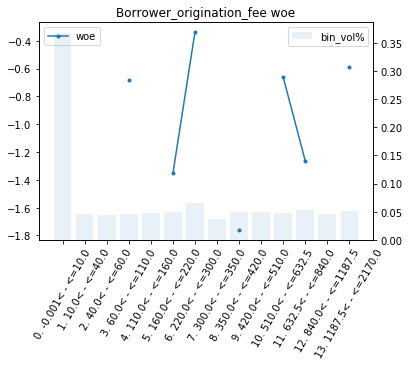

1. Coarseclass Group 0 Bad bins
IV is 2.34292315660659


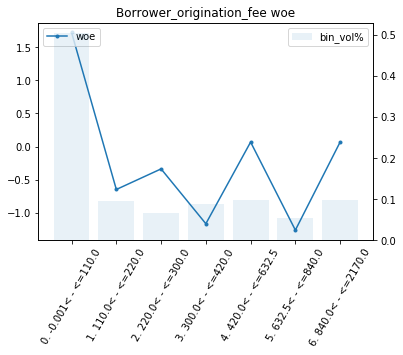

feature and target correlation is 0.0579469523340289, woe should decrease as feature increase
input bin edges :  [-1.000e-03  1.100e+02  2.200e+02  3.000e+02  4.200e+02  6.325e+02
  8.400e+02  2.170e+03] 
 dropping index [2 3 6]
output bin edges :  [-1.000e-03  1.100e+02  4.200e+02  6.325e+02  2.170e+03]
2. Coarseclass Group non-mono bins round 1
IV is 2.0766958150997312


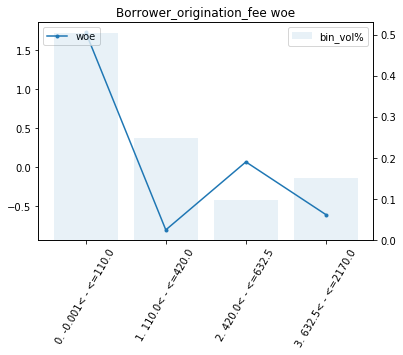

feature and target correlation is 0.0579469523340289, woe should decrease as feature increase
input bin edges :  [-1.000e-03  1.100e+02  4.200e+02  6.325e+02  2.170e+03] 
 dropping index [2]
output bin edges :  [-1.000e-03  1.100e+02  6.325e+02  2.170e+03]
2. Coarseclass Group non-mono bins round 2
IV is 1.9595349439564516


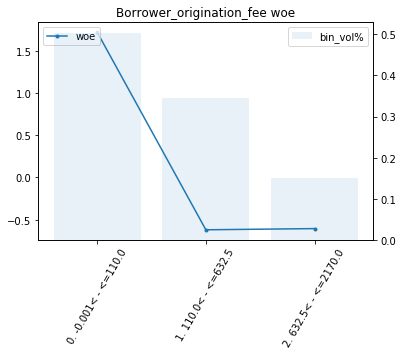

feature and target correlation is 0.0579469523340289, woe should decrease as feature increase
input bin edges :  [-1.000e-03  1.100e+02  6.325e+02  2.170e+03] 
 dropping index [2]
output bin edges :  [-1.00e-03  1.10e+02  2.17e+03]
2. Coarseclass Group non-mono bins round 3
IV is 1.9594766795235077


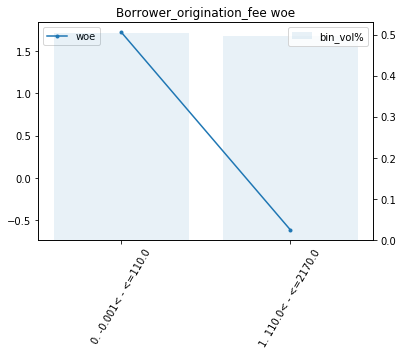

feature and target correlation is 0.0579469523340289, woe should decrease as feature increase
input bin edges :  [-1.00e-03  1.10e+02  2.17e+03] 
 dropping index []
output bin edges :  [-1.00e-03  1.10e+02  2.17e+03]
woe encoding {'0. -0.001< - <=110.0': 1.7235643640379013, '1. 110.0< - <=2170.0': -0.6170141253953593}
num of bins is  18
0.Fineclass
IV is 1.4808879340531882


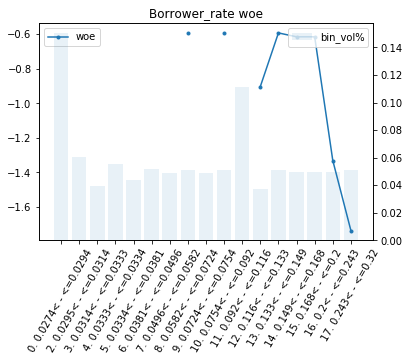

1. Coarseclass Group 0 Bad bins
IV is 2.7914667992373605


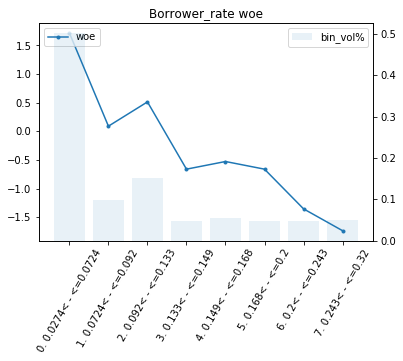

feature and target correlation is 0.13640041507594283, woe should decrease as feature increase
input bin edges :  [0.0274 0.0724 0.092  0.133  0.149  0.168  0.2    0.243  0.3202] 
 dropping index [2 4]
output bin edges :  [0.0274 0.0724 0.133  0.168  0.2    0.243  0.3202]
2. Coarseclass Group non-mono bins round 1
IV is 2.771047020536545


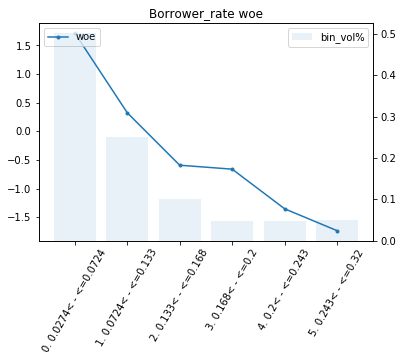

feature and target correlation is 0.13640041507594283, woe should decrease as feature increase
input bin edges :  [0.0274 0.0724 0.133  0.168  0.2    0.243  0.3202] 
 dropping index []
output bin edges :  [0.0274 0.0724 0.133  0.168  0.2    0.243  0.3202]
woe encoding {'0. 0.0274< - <=0.0724': 1.716963680006549, '1. 0.0724< - <=0.133': 0.32402477616799, '2. 0.133< - <=0.168': -0.592265955706165, '3. 0.168< - <=0.2': -0.6612588271931165, '4. 0.2< - <=0.243': -1.3544060077530617, '5. 0.243< - <=0.32': -1.736340618451032}
num of bins is  6
0.Fineclass
IV is 0.8199901159020688


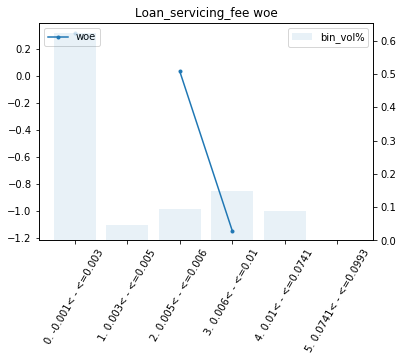

1. Coarseclass Group 0 Bad bins
IV is 0.4376546401728779


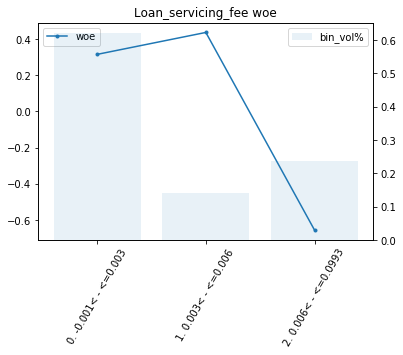

feature and target correlation is -0.020616890943030493, woe should increase as feature increase
input bin edges :  [-0.001   0.003   0.006   0.0993] 
 dropping index [1]
output bin edges :  [-0.001   0.006   0.0993]
2. Coarseclass Group non-mono bins round 1
IV is 0.43485999019143684


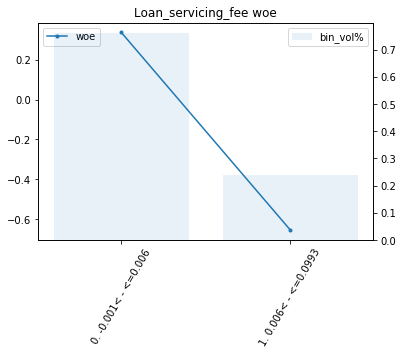

feature and target correlation is -0.020616890943030493, woe should increase as feature increase
input bin edges :  [-0.001   0.006   0.0993] 
 dropping index [1]
output bin edges :  [-0.001   0.0993]
2. Coarseclass Group non-mono bins round 2
IV is 0.0


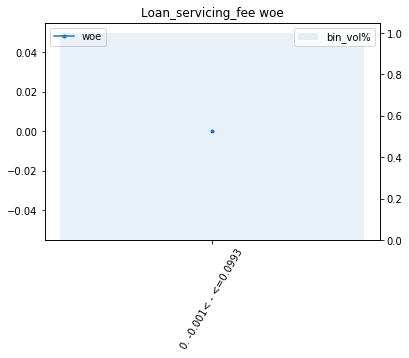

feature and target correlation is -0.020616890943030493, woe should increase as feature increase
input bin edges :  [-0.001   0.0993] 
 dropping index []
output bin edges :  [-0.001   0.0993]
woe encoding {'0. -0.001< - <=0.0993': 0.0}
num of bins is  20
0.Fineclass
IV is 1.6931577133660825


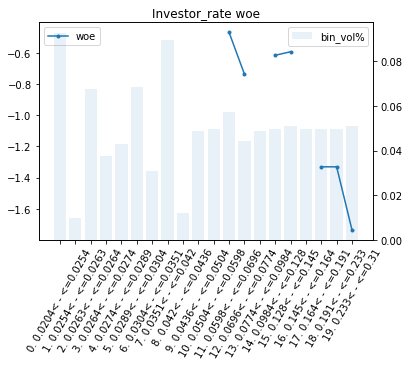

1. Coarseclass Group 0 Bad bins
IV is 3.3529599552148914


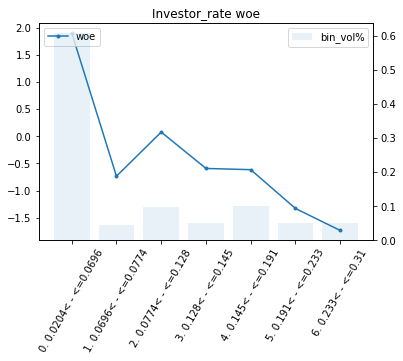

feature and target correlation is 0.14401645363596513, woe should decrease as feature increase
input bin edges :  [0.0204 0.0696 0.0774 0.128  0.145  0.191  0.233  0.3102] 
 dropping index [2]
output bin edges :  [0.0204 0.0696 0.128  0.145  0.191  0.233  0.3102]
2. Coarseclass Group non-mono bins round 1
IV is 3.3019727447773777


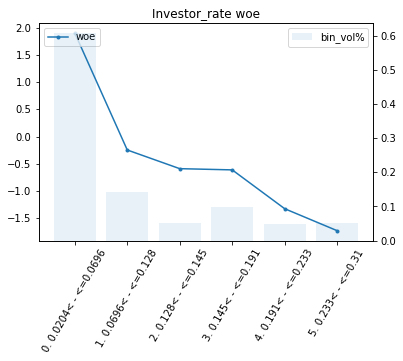

feature and target correlation is 0.14401645363596513, woe should decrease as feature increase
input bin edges :  [0.0204 0.0696 0.128  0.145  0.191  0.233  0.3102] 
 dropping index []
output bin edges :  [0.0204 0.0696 0.128  0.145  0.191  0.233  0.3102]
woe encoding {'0. 0.0204< - <=0.0696': 1.9091699960330457, '1. 0.0696< - <=0.128': -0.24788853957783902, '2. 0.128< - <=0.145': -0.592265955706165, '3. 0.145< - <=0.191': -0.6147388115582237, '4. 0.191< - <=0.233': -1.3308755103428678, '5. 0.233< - <=0.31': -1.736340618451032}
num of bins is  18
0.Fineclass
IV is 0.07804857306043454


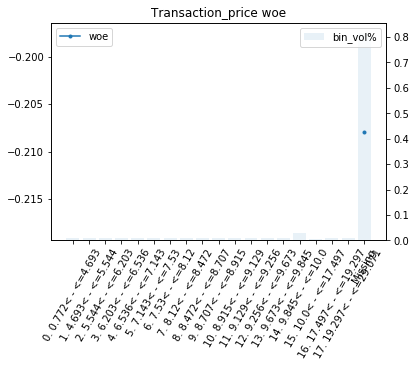

1. Coarseclass Group 0 Bad bins
IV is 0.07804857306043454


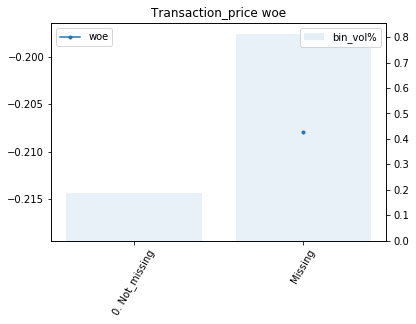

woe encoding {'0. Not_missing': 0.0, 'Missing': -0.20789724074133603}
num of bins is  5
0.Fineclass
IV is 0.10994445466481856


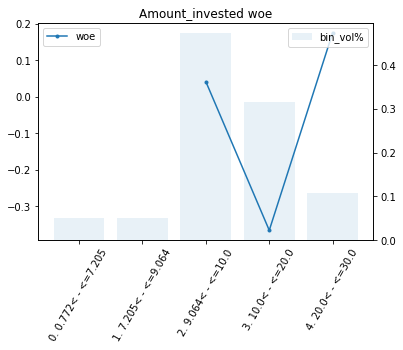

1. Coarseclass Group 0 Bad bins
IV is 0.16636047256202616


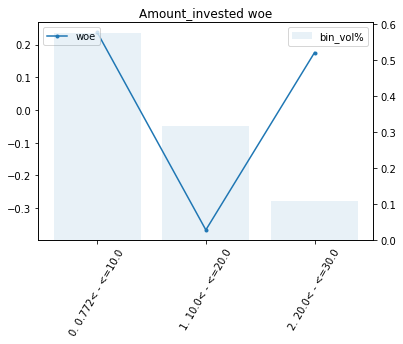

feature and target correlation is 0.021811046945181153, woe should decrease as feature increase
input bin edges :  [ 0.772 10.    20.    30.   ] 
 dropping index [2]
output bin edges :  [ 0.772 10.    30.   ]
2. Coarseclass Group non-mono bins round 1
IV is 0.11976870142181857


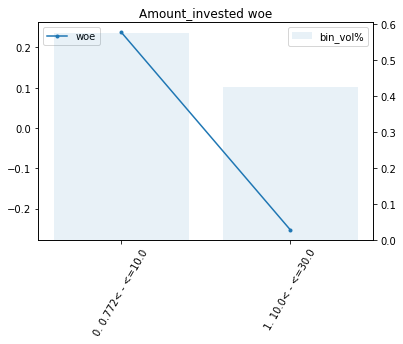

feature and target correlation is 0.021811046945181153, woe should decrease as feature increase
input bin edges :  [ 0.772 10.    30.   ] 
 dropping index []
output bin edges :  [ 0.772 10.    30.   ]
woe encoding {'0. 0.772< - <=10.0': 0.23774040757097742, '1. 10.0< - <=30.0': -0.2531517096221134}
num of bins is  16
0.Fineclass
IV is 2.7642404735839285


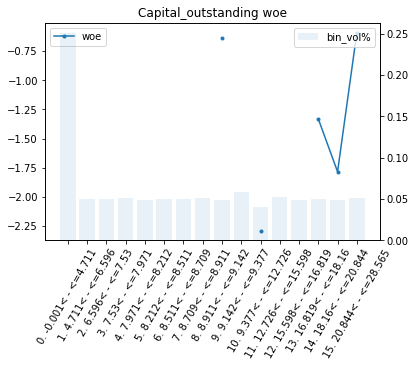

1. Coarseclass Group 0 Bad bins
IV is 3.7798931059194425


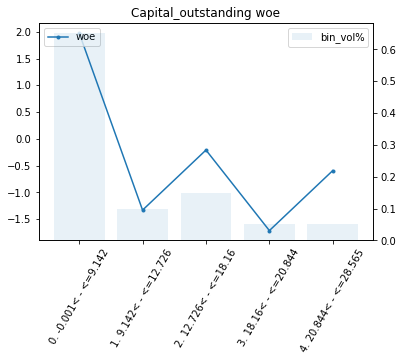

feature and target correlation is 0.11254410853870483, woe should decrease as feature increase
input bin edges :  [-1.00000000e-03  9.14200000e+00  1.27260000e+01  1.81600000e+01
  2.08440000e+01  2.85652835e+01] 
 dropping index [2 4]
output bin edges :  [-1.00000000e-03  9.14200000e+00  1.81600000e+01  2.85652835e+01]
2. Coarseclass Group non-mono bins round 1
IV is 3.411010163976677


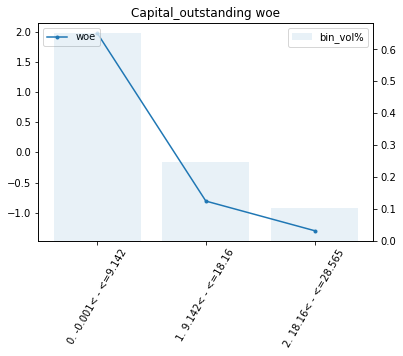

feature and target correlation is 0.11254410853870483, woe should decrease as feature increase
input bin edges :  [-1.00000000e-03  9.14200000e+00  1.81600000e+01  2.85652835e+01] 
 dropping index []
output bin edges :  [-1.00000000e-03  9.14200000e+00  1.81600000e+01  2.85652835e+01]
woe encoding {'0. -0.001< - <=9.142': 1.977798502422142, '1. 9.142< - <=18.16': -0.8061928519154508, '2. 18.16< - <=28.565': -1.2965864368642355}
num of bins is  16
0.Fineclass
IV is 3.8730940232526407


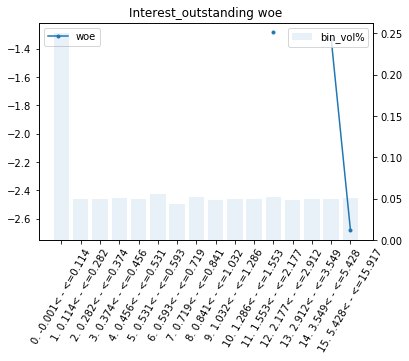

1. Coarseclass Group 0 Bad bins
IV is 5.047470807916607


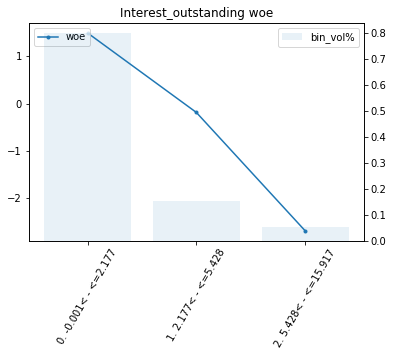

feature and target correlation is 0.27601000489692074, woe should decrease as feature increase
input bin edges :  [-1.0000e-03  2.1770e+00  5.4280e+00  1.5917e+01] 
 dropping index []
output bin edges :  [-1.0000e-03  2.1770e+00  5.4280e+00  1.5917e+01]
woe encoding {'0. -0.001< - <=2.177': 1.488563511248519, '1. 2.177< - <=5.428': -0.18680084759800064, '2. 5.428< - <=15.917': -2.6812769484021515}
num of bins is  20
0.Fineclass
IV is 1.828444068472803


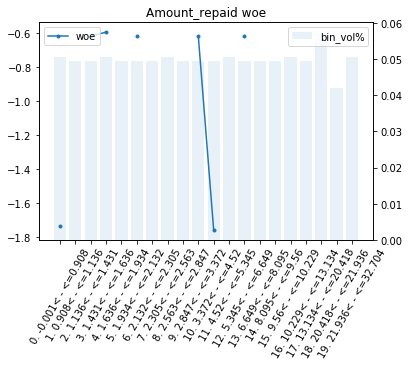

1. Coarseclass Group 0 Bad bins
IV is 2.9876161511086967


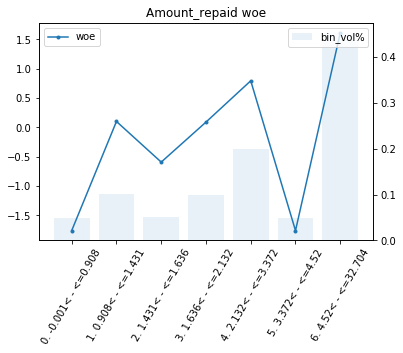

feature and target correlation is -0.06585538033950139, woe should increase as feature increase
input bin edges :  [-1.00000000e-03  9.08000000e-01  1.43100000e+00  1.63600000e+00
  2.13200000e+00  3.37200000e+00  4.52000000e+00  3.27041579e+01] 
 dropping index [2 4]
output bin edges :  [-1.00000000e-03  9.08000000e-01  1.63600000e+00  3.37200000e+00
  4.52000000e+00  3.27041579e+01]
2. Coarseclass Group non-mono bins round 1
IV is 2.8919349058634776


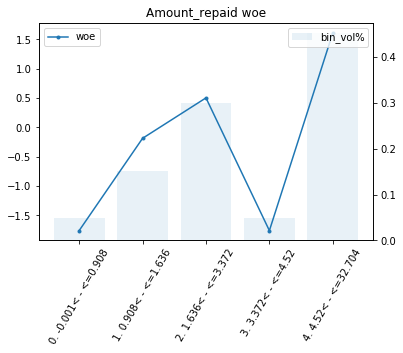

feature and target correlation is -0.06585538033950139, woe should increase as feature increase
input bin edges :  [-1.00000000e-03  9.08000000e-01  1.63600000e+00  3.37200000e+00
  4.52000000e+00  3.27041579e+01] 
 dropping index [2]
output bin edges :  [-1.00000000e-03  9.08000000e-01  3.37200000e+00  4.52000000e+00
  3.27041579e+01]
2. Coarseclass Group non-mono bins round 2
IV is 2.7989403899109764


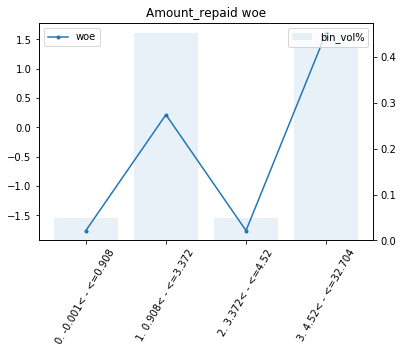

feature and target correlation is -0.06585538033950139, woe should increase as feature increase
input bin edges :  [-1.00000000e-03  9.08000000e-01  3.37200000e+00  4.52000000e+00
  3.27041579e+01] 
 dropping index [2]
output bin edges :  [-1.00000000e-03  9.08000000e-01  4.52000000e+00  3.27041579e+01]
2. Coarseclass Group non-mono bins round 3
IV is 2.033743590308087


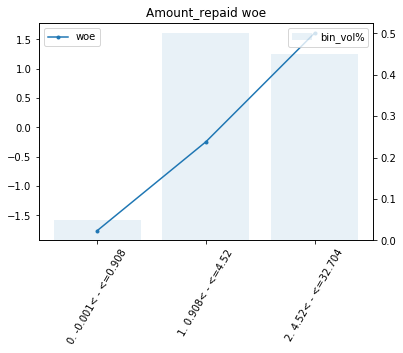

feature and target correlation is -0.06585538033950139, woe should increase as feature increase
input bin edges :  [-1.00000000e-03  9.08000000e-01  4.52000000e+00  3.27041579e+01] 
 dropping index []
output bin edges :  [-1.00000000e-03  9.08000000e-01  4.52000000e+00  3.27041579e+01]
woe encoding {'0. -0.001< - <=0.908': -1.7598711158612261, '1. 0.908< - <=4.52': -0.24451964251173408, '2. 4.52< - <=32.704': 1.60988473996611}
num of bins is  19
0.Fineclass
IV is 2.434107590019172


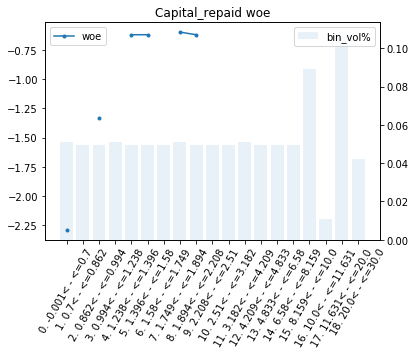

1. Coarseclass Group 0 Bad bins
IV is 3.9821555498814005


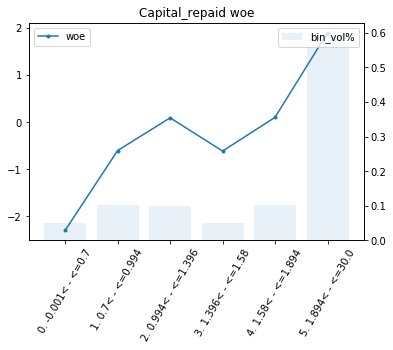

feature and target correlation is -0.07787808202345928, woe should increase as feature increase
input bin edges :  [-1.000e-03  7.000e-01  9.940e-01  1.396e+00  1.580e+00  1.894e+00
  3.000e+01] 
 dropping index [2]
output bin edges :  [-1.000e-03  7.000e-01  1.396e+00  1.580e+00  1.894e+00  3.000e+01]
2. Coarseclass Group non-mono bins round 1
IV is 3.927839809944482


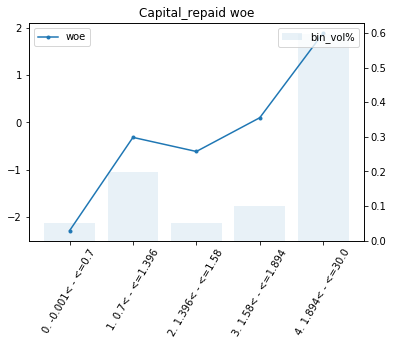

feature and target correlation is -0.07787808202345928, woe should increase as feature increase
input bin edges :  [-1.000e-03  7.000e-01  1.396e+00  1.580e+00  1.894e+00  3.000e+01] 
 dropping index [2]
output bin edges :  [-1.000e-03  7.000e-01  1.580e+00  1.894e+00  3.000e+01]
2. Coarseclass Group non-mono bins round 2
IV is 3.918316918959173


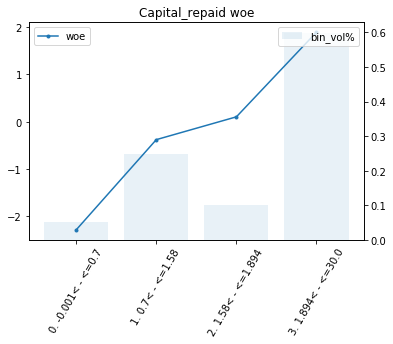

feature and target correlation is -0.07787808202345928, woe should increase as feature increase
input bin edges :  [-1.000e-03  7.000e-01  1.580e+00  1.894e+00  3.000e+01] 
 dropping index []
output bin edges :  [-1.000e-03  7.000e-01  1.580e+00  1.894e+00  3.000e+01]
woe encoding {'0. -0.001< - <=0.7': -2.2947942912062773, '1. 0.7< - <=1.58': -0.38254542472409603, '2. 1.58< - <=1.894': 0.10088122485378029, '3. 1.894< - <=30.0': 1.8963375559631614}
num of bins is  20
0.Fineclass
IV is 1.4669123791236638


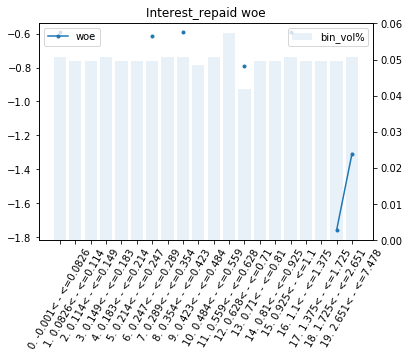

1. Coarseclass Group 0 Bad bins
IV is 0.9686365820692775


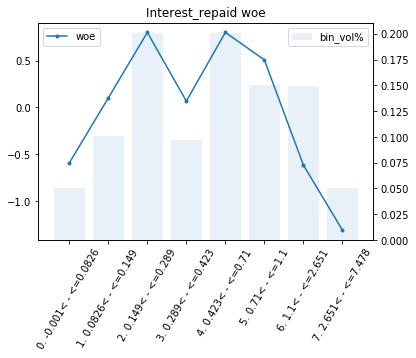

feature and target correlation is 0.08118761028853003, woe should decrease as feature increase
input bin edges :  [-1.000e-03  8.260e-02  1.490e-01  2.890e-01  4.230e-01  7.100e-01
  1.100e+00  2.651e+00  7.478e+00] 
 dropping index [1 1 4]
output bin edges :  [-1.000e-03  1.490e-01  2.890e-01  7.100e-01  1.100e+00  2.651e+00
  7.478e+00]
2. Coarseclass Group non-mono bins round 1
IV is 0.8686352816310938


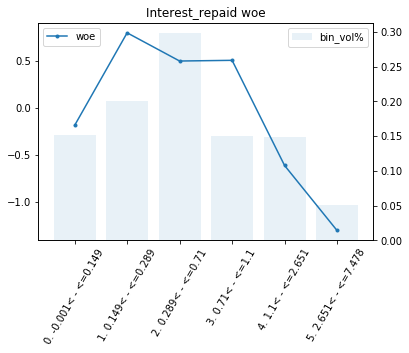

feature and target correlation is 0.08118761028853003, woe should decrease as feature increase
input bin edges :  [-1.000e-03  1.490e-01  2.890e-01  7.100e-01  1.100e+00  2.651e+00
  7.478e+00] 
 dropping index [1 3]
output bin edges :  [-1.000e-03  2.890e-01  1.100e+00  2.651e+00  7.478e+00]
2. Coarseclass Group non-mono bins round 2
IV is 0.7205178948896989


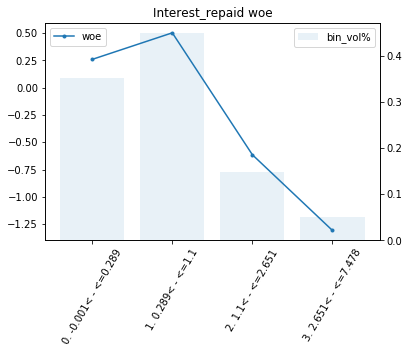

feature and target correlation is 0.08118761028853003, woe should decrease as feature increase
input bin edges :  [-1.000e-03  2.890e-01  1.100e+00  2.651e+00  7.478e+00] 
 dropping index [1]
output bin edges :  [-1.000e-03  1.100e+00  2.651e+00  7.478e+00]
2. Coarseclass Group non-mono bins round 3
IV is 0.7006816520419561


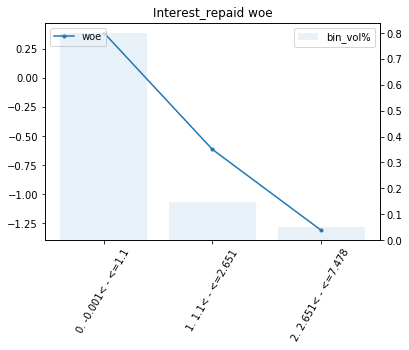

feature and target correlation is 0.08118761028853003, woe should decrease as feature increase
input bin edges :  [-1.000e-03  1.100e+00  2.651e+00  7.478e+00] 
 dropping index []
output bin edges :  [-1.000e-03  1.100e+00  2.651e+00  7.478e+00]
woe encoding {'0. -0.001< - <=1.1': 0.3871734430165069, '1. 1.1< - <=2.651': -0.6147388115582235, '2. 2.651< - <=7.478': -1.307885992118169}
num of bins is  1
0.Fineclass
IV is 0.0


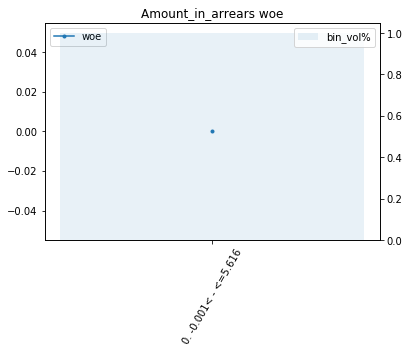

num of bins is  17
0.Fineclass
IV is 0.4497334050972074


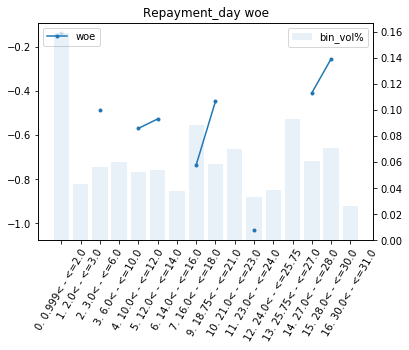

1. Coarseclass Group 0 Bad bins
IV is 0.28573673739147


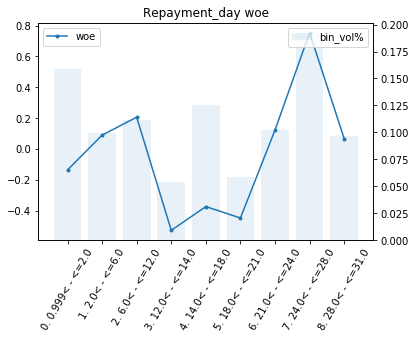

feature and target correlation is -0.004885348349617844, woe should increase as feature increase
input bin edges :  [ 0.999  2.     6.    12.    14.    18.    21.    24.    28.    31.   ] 
 dropping index [2 5 7]
output bin edges :  [ 0.999  2.    12.    14.    21.    28.    31.   ]
2. Coarseclass Group non-mono bins round 1
IV is 0.23790969061786246


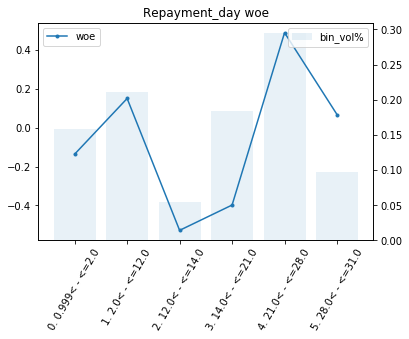

feature and target correlation is -0.004885348349617844, woe should increase as feature increase
input bin edges :  [ 0.999  2.    12.    14.    21.    28.    31.   ] 
 dropping index [1 5]
output bin edges :  [ 0.999 12.    14.    21.    31.   ]
2. Coarseclass Group non-mono bins round 2
IV is 0.1990059961515231


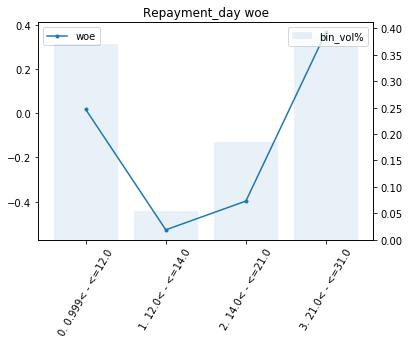

feature and target correlation is -0.004885348349617844, woe should increase as feature increase
input bin edges :  [ 0.999 12.    14.    21.    31.   ] 
 dropping index [1]
output bin edges :  [ 0.999 14.    21.    31.   ]
2. Coarseclass Group non-mono bins round 3
IV is 0.1638546357824262


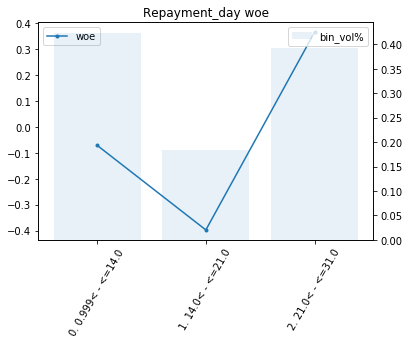

feature and target correlation is -0.004885348349617844, woe should increase as feature increase
input bin edges :  [ 0.999 14.    21.    31.   ] 
 dropping index [1]
output bin edges :  [ 0.999 21.    31.   ]
2. Coarseclass Group non-mono bins round 4
IV is 0.13198695093921364


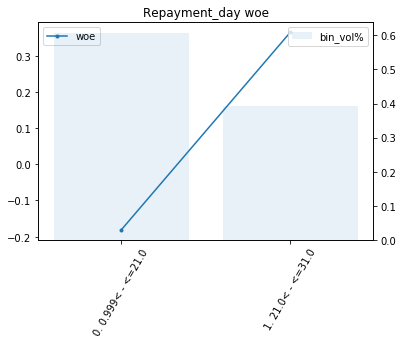

feature and target correlation is -0.004885348349617844, woe should increase as feature increase
input bin edges :  [ 0.999 21.    31.   ] 
 dropping index []
output bin edges :  [ 0.999 21.    31.   ]
woe encoding {'0. 0.999< - <=21.0': -0.18126066722238543, '1. 21.0< - <=31.0': 0.3660904414535026}
num of bins is  20
0.Fineclass
IV is 1.2520308787953238


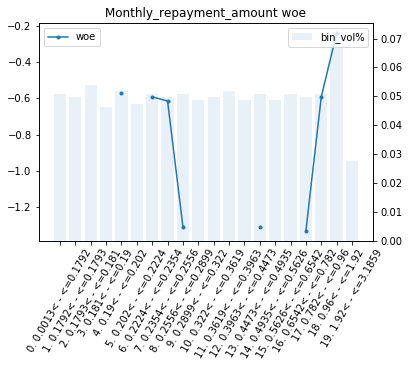

1. Coarseclass Group 0 Bad bins
IV is 0.9019717623065617


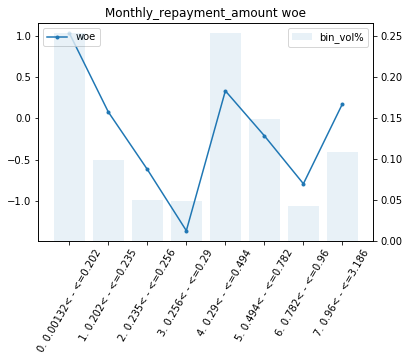

feature and target correlation is -0.005067464141621808, woe should increase as feature increase
input bin edges :  [1.3180e-03 2.0200e-01 2.3540e-01 2.5560e-01 2.8990e-01 4.9350e-01
 7.8200e-01 9.6000e-01 3.1859e+00] 
 dropping index [1 2 2 5 5]
output bin edges :  [1.3180e-03 2.5560e-01 2.8990e-01 7.8200e-01 9.6000e-01 3.1859e+00]
2. Coarseclass Group non-mono bins round 1
IV is 0.5576540099099114


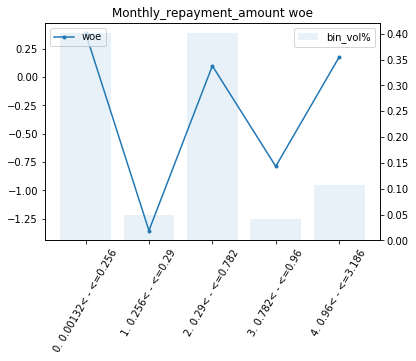

feature and target correlation is -0.005067464141621808, woe should increase as feature increase
input bin edges :  [1.3180e-03 2.5560e-01 2.8990e-01 7.8200e-01 9.6000e-01 3.1859e+00] 
 dropping index [1 3]
output bin edges :  [1.3180e-03 2.8990e-01 9.6000e-01 3.1859e+00]
2. Coarseclass Group non-mono bins round 2
IV is 0.006921961890331294


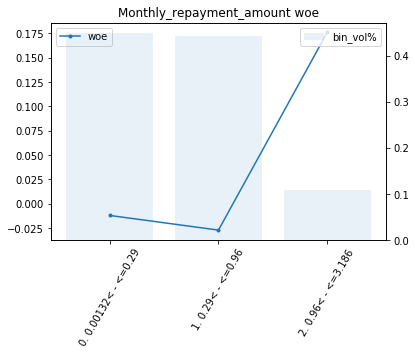

feature and target correlation is -0.005067464141621808, woe should increase as feature increase
input bin edges :  [1.3180e-03 2.8990e-01 9.6000e-01 3.1859e+00] 
 dropping index [1]
output bin edges :  [1.3180e-03 9.6000e-01 3.1859e+00]
2. Coarseclass Group non-mono bins round 3
IV is 0.00682016161222765


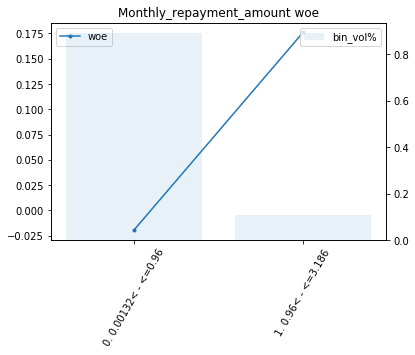

feature and target correlation is -0.005067464141621808, woe should increase as feature increase
input bin edges :  [1.3180e-03 9.6000e-01 3.1859e+00] 
 dropping index []
output bin edges :  [1.3180e-03 9.6000e-01 3.1859e+00]
woe encoding {'0. 0.00132< - <=0.96': -0.019404941020721815, '1. 0.96< - <=3.186': 0.175782533026898}
num of bins is  16
0.Fineclass
IV is 3.628511260473773


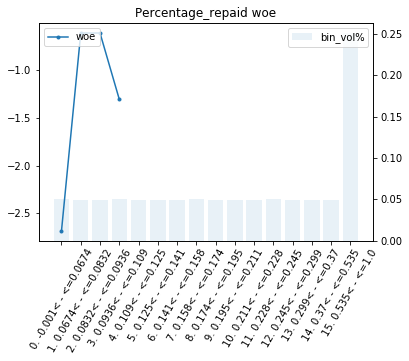

1. Coarseclass Group 0 Bad bins
IV is 5.380306774834427


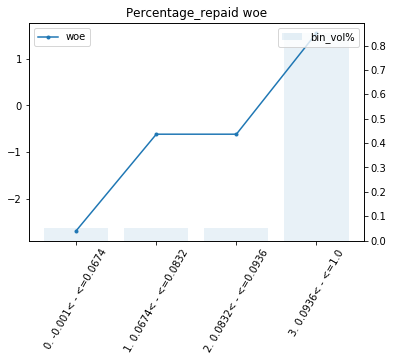

feature and target correlation is -0.10136656807414093, woe should increase as feature increase
input bin edges :  [-0.001   0.0674  0.0832  0.0936  1.    ] 
 dropping index [2]
output bin edges :  [-0.001   0.0674  0.0936  1.    ]
2. Coarseclass Group non-mono bins round 1
IV is 5.380306774834426


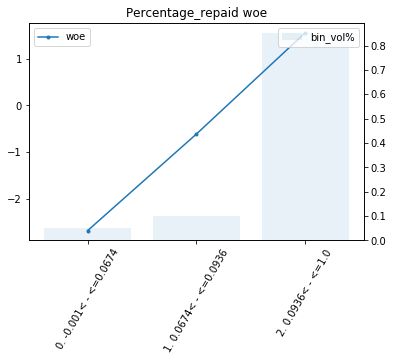

feature and target correlation is -0.10136656807414093, woe should increase as feature increase
input bin edges :  [-0.001   0.0674  0.0936  1.    ] 
 dropping index []
output bin edges :  [-0.001   0.0674  0.0936  1.    ]
woe encoding {'0. -0.001< - <=0.0674': -2.6812769484021515, '1. 0.0674< - <=0.0936': -0.6147388115582237, '2. 0.0936< - <=1.0': 1.551714107111242}


In [132]:
target = 'TARGET'
fineclass_summary = pd.DataFrame()
coarseclass_summary = pd.DataFrame()
df_woe = pd.DataFrame()
woe_dict_all = {}
cols_to_check =[]

for feat in num_cols[:10]:
    #Initialisation
    eval_df_summary_fc = pd.DataFrame()
    eval_df_summary_cc = pd.DataFrame()
    
    ########## 0. Fineclass ############
    #missing value or special values are specified to be treated as categoricals, split to num and cat      
    s_num, s_cat = logreg_binning.split_num_cat(df[feat], special_values = special_values_dict[feat]) # if there is any special_values, use this function to specify it
    s_num_fc, num_bin_edges_fc = logreg_binning.num_fc(s_num, bin_num_fineclass =20)
    s_cat_fc, cat_bin_values_fc = logreg_binning.cat_fc(s_cat)
    s_fc = logreg_binning.combine_num_cat_fc(s_num_fc, s_cat_fc)
    eval_df_summary_fc = logreg_binning.bin_woe_iv(s_fc, df[target], '0.Fineclass')
        
    #Append to fineclass summary
    if fineclass_summary is None:
        fineclass_summary = eval_df_summary_fc
    else:
        fineclass_summary = fineclass_summary.append(eval_df_summary_fc)

    ########## Exception handling based on 0. Fineclass ############
    
    #if the feature has inf or missing iv, add it to cols_to_check and not proceed further
    if eval_df_summary_fc.loc[eval_df_summary_fc['feat']=='Total']['iv'].isin([0, np.inf]).values[0]:
        cols_to_check.append(feat)
        #finish grouping if feature has 0 or infinity iv in fineclass
    
    ########## 1. Coarseclass Group 0 Bad bins ############
    else:
        eval_df_summary_fc = eval_df_summary_fc.loc[eval_df_summary_fc['feat']!='Total']
        
        #if all numeric bins has 0 bad in total, group the numeric values into 1 bin as not missing
        if eval_df_summary_fc.loc[eval_df_summary_fc['feat_num_index'].notnull()]['N_bad'].sum()==0:
            s_num_cc =  s_num.astype('object')
            s_num_cc.values[:] = '0. Not_missing'
            
            s_cc = logreg_binning.combine_num_cat_fc(s_num_cc, s_cat_fc)
            eval_df_summary_cc = logreg_binning.bin_woe_iv(s_cc, df[target], desc = '1. Coarseclass Group 0 Bad bins')
            
            eval_df_summary_cc.loc[eval_df_summary_cc['feat']=='0. Not_missing', 'woe'] = 0

            #Append to coarseclass summary and finish grouping
            if coarseclass_summary is None:
                coarseclass_summary = eval_df_summary_cc
            else:
                coarseclass_summary = coarseclass_summary.append(eval_df_summary_cc)

            eval_df_summary_cc = eval_df_summary_cc.loc[eval_df_summary_cc['feat']!='Total']
            
        #if all numeric bins has >0 bad in total, and if any numeric bin has 0 bad, group 0 bad bin 
        elif np.any(eval_df_summary_fc.loc[eval_df_summary_fc['feat_num_index'].notnull()]['N_bad'],0):    
            num_bin_edges_cc = logreg_binning.num_cc_edges_nonzerobad(s_num, num_bin_edges_fc, eval_df_summary_fc)
            s_num_cc = logreg_binning.num_cc(s_num, num_bin_edges_cc)

            s_cc = logreg_binning.combine_num_cat_fc(s_num_cc, s_cat_fc)
            eval_df_summary_cc = logreg_binning.bin_woe_iv(s_cc, df[target], desc = '1. Coarseclass Group 0 Bad bins')

            #Append to coarseclass summary
            if coarseclass_summary is None:
                coarseclass_summary = eval_df_summary_cc
            else:
                coarseclass_summary = coarseclass_summary.append(eval_df_summary_cc)
                
            eval_df_summary_cc = eval_df_summary_cc.loc[eval_df_summary_cc['feat']!='Total']
            
            #If only 1 numeric bin, do not enforce monotonicity, Only when there are at least two numeric bins, enforce monotonicity
            if s_num_cc.nunique() >= 2:
                
                ########## 2. Enforce monotonicity ############
                #make the while loop start by makeing two arrays having unequal lengths
                num_bin_edges_cc_ori = np.append(num_bin_edges_cc, 'to make the while loop start running')
                round_count = 1
                while len(num_bin_edges_cc_ori) != len(num_bin_edges_cc):
                    num_bin_edges_cc_ori = num_bin_edges_cc
                    num_bin_edges_cc = logreg_binning.num_cc_edges_woe_enforce_monotonicity(s_num, df[target], num_bin_edges = num_bin_edges_cc, eval_df_summary = eval_df_summary_cc)
                    
                    #if it is already monotonic, do not save the result to summary
                    if len(num_bin_edges_cc_ori) != len(num_bin_edges_cc):
                        s_num_cc = logreg_binning.num_cc(s_num, num_bin_edges_cc)
                        s_cc = logreg_binning.combine_num_cat_fc(s_num_cc, s_cat_fc)
                        eval_df_summary_cc = logreg_binning.bin_woe_iv(s_cc, df[target], desc = '2. Coarseclass Group non-mono bins round ' + str(round_count))
                        
                        #Append to summary
                        if coarseclass_summary is None:
                            coarseclass_summary = eval_df_summary_cc
                        else:
                            coarseclass_summary = coarseclass_summary.append(eval_df_summary_cc)
                        
                        eval_df_summary_cc = eval_df_summary_cc.loc[eval_df_summary_cc['feat']!='Total']
                        
                        round_count = round_count + 1
                
    #If feature does not need to be checked, save result of coarclass if there is coarse class results, otherwise, use fineclass results
    if feat not in cols_to_check:
        if eval_df_summary_cc.empty:
            s_woe, woe_dict = logreg_binning.cc_to_woe(s_fc, eval_df_summary_fc)
        else:
            s_woe, woe_dict = logreg_binning.cc_to_woe(s_cc, eval_df_summary_cc)                

        df_woe = pd.concat([df_woe, s_woe], axis = 1)
        woe_dict_all[feat] = woe_dict

#### Categorical feature binning
- The solution below is designed for profiling or quick experimentation, it minimizes manual work, but it's not meant for final solution
- Bins with 0 bad (often caused by low volume) is assigned 0.01 bad for woe to be calculated. Woe is smoothened based on the number of goods in the bin. min_bin_count and smoothing factors are set up judgementally. min_bin_count = 20 means if there are 20 observations in the bin, woe is applied 50% weight. smoothing = 10 means if there are 10 more observations in the bin than min_bin_count, woe is applied 73% weight; 20 more observations -> woe is applied 88% weight; 30 more observations -> woe is applied 95% weight. So depending on how big the dataset is, min_bin_count and smoothing factors should be adjusted accordingly.
- For final solution, it is recommended that fineclass result to be checked for each categorical feature individually to guide manual coarse class

0.Fineclass
IV is 1.9038734794854049


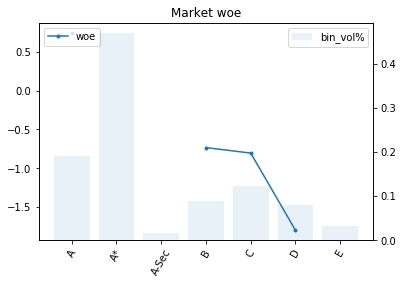

woe encoding {'A': 0.751289421548293, 'A*': 6.261054469903064, 'A-Sec': 1.1019775769218763, 'B': -0.7308316882417918, 'C': -0.8033881175935657, 'D': -1.7910696270727635, 'E': 2.5432758400182247}
0.Fineclass
IV is 0.0005665411442213395


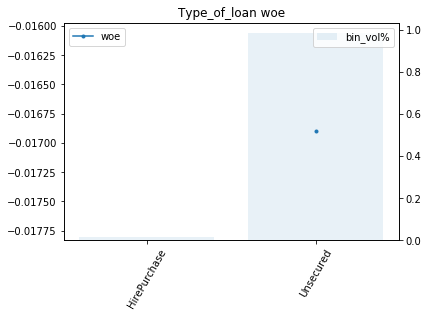

woe encoding {'HirePurchase': 1.1012919584010672, 'Unsecured': -0.01599313286638518}
0.Fineclass
IV is inf


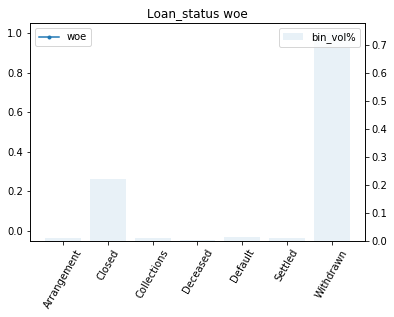

0.Fineclass
IV is 7.776647840366403


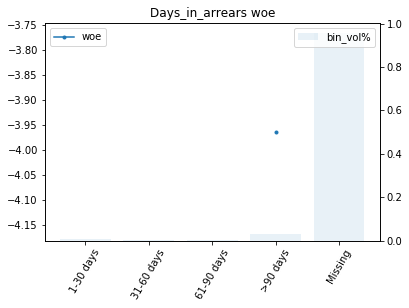

woe encoding {'1-30 days': 0.530326599361598, '31-60 days': 0.2022862511569104, '61-90 days': 0.12820412592036537, '>90 days': -2.732285564016216, 'Missing': 6.972601015494065}
0.Fineclass
IV is inf


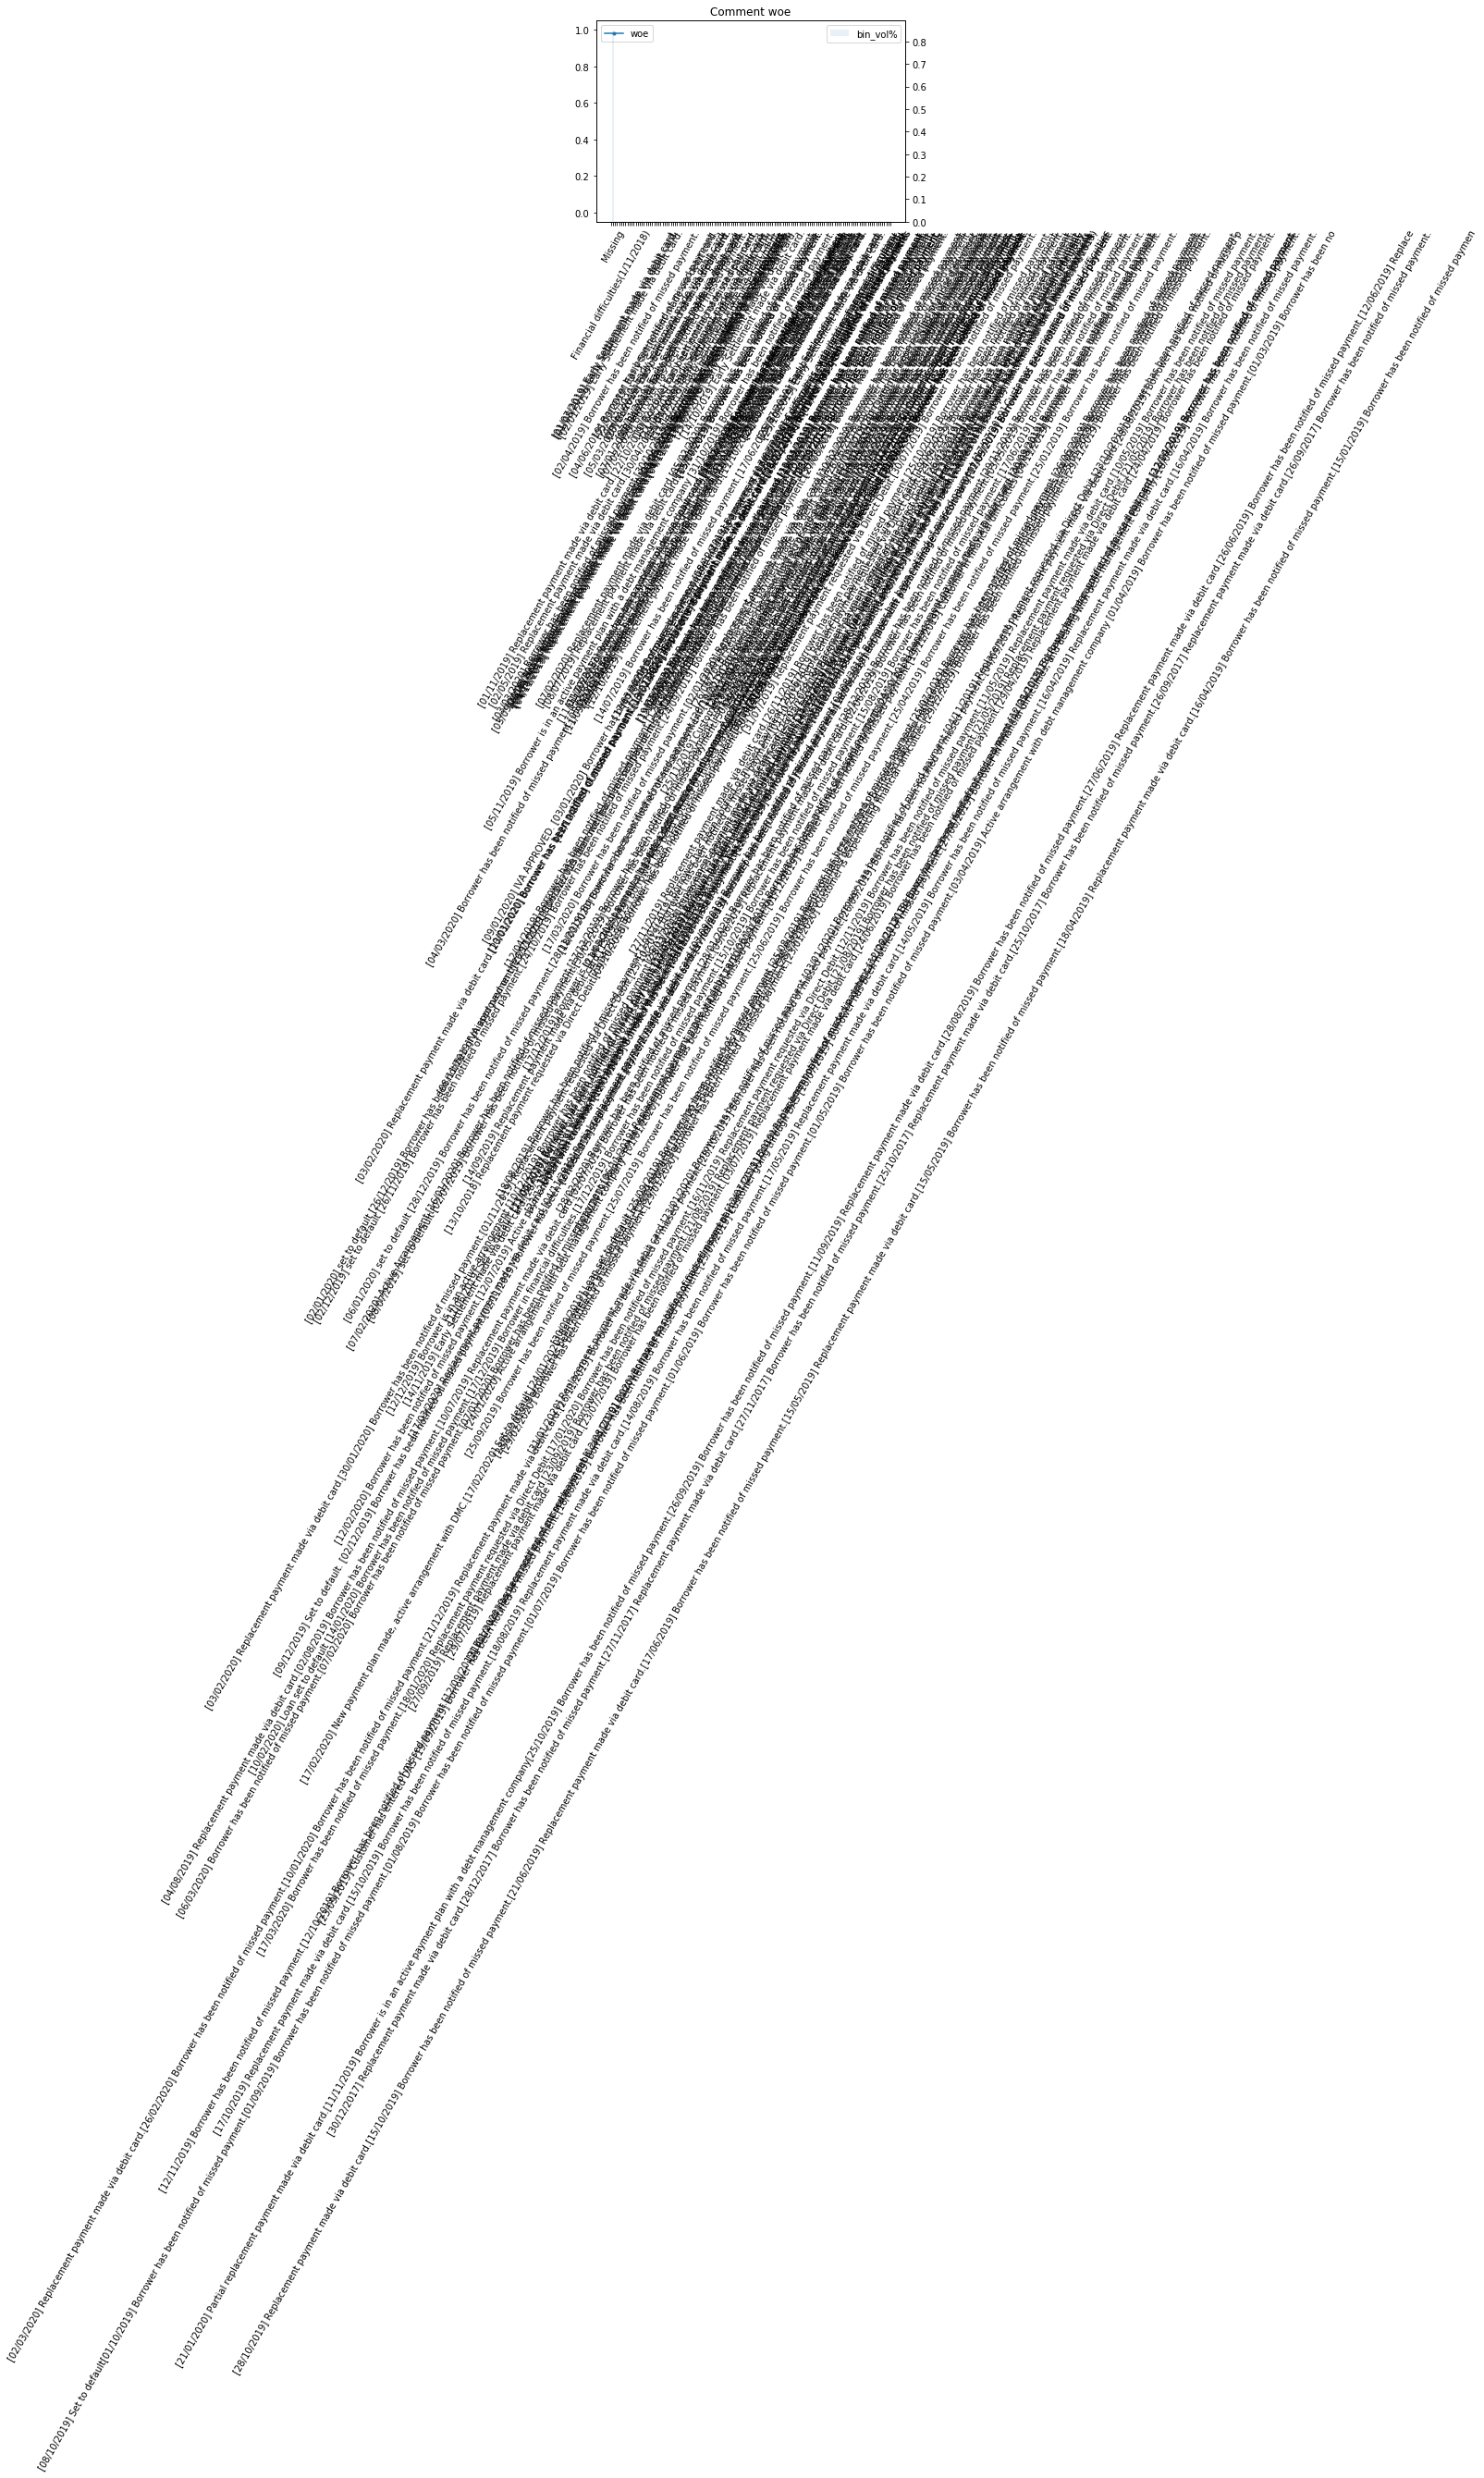

0.Fineclass
IV is 0.9089608939729544


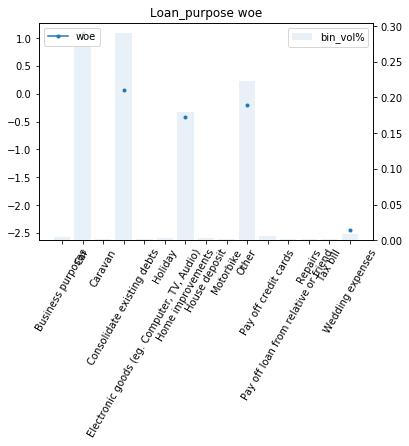

woe encoding {'Business purposes': 0.26926091011942405, 'Car': 1.1072896151492926, 'Caravan': 0.02803563427141883, 'Consolidate existing debts': 0.07219073238883204, 'Electronic goods (eg. Computer, TV, Audio)': 0.12897362828029052, 'Holiday': 0.20312417145191972, 'Home improvements': -0.41331682878287807, 'House deposit': 0.20312417145191972, 'Motorbike': 0.12897362828029052, 'Other': -0.19518607146636, 'Pay off credit cards': 0.3331494711007078, 'Pay off loan from relative or friend': 0.12897362828029052, 'Repairs': 0.12897362828029052, 'Tax bill': 0.02803563427141883, 'Wedding expenses': -0.5657181286086904}


In [133]:
object_cols = object_cols_ori
for feat in object_cols:    
    ########## 0. Fineclass ############
    s_cat_fc, cat_bin_values_fc = logreg_binning.cat_fc(df[feat])
    eval_df_summary_fc = logreg_binning.bin_woe_iv(s_cat_fc, df[target], '0.Fineclass')
        
    if fineclass_summary is None:
        fineclass_summary = eval_df_summary_fc
    else:
        fineclass_summary = fineclass_summary.append(eval_df_summary_fc)        
    
    ########## Exception handling based on 0. Fineclass ############
    #if the feature has inf or missing iv, add it to cols_to_check and not proceed further
    if eval_df_summary_fc.loc[eval_df_summary_fc['feat']=='Total']['iv'].isin([0, np.inf]).values[0]:
        cols_to_check.append(feat)
        
    else:
        ########## 1. Coarseclass smoothe 0 bad bin woe ############
        #if there is any categorical bin having 0 bad and 
        eval_df_summary_fc = eval_df_summary_fc.loc[eval_df_summary_fc['feat']!='Total']
            
        if eval_df_summary_fc.loc[((eval_df_summary_fc['N_bad']==0) & (eval_df_summary_fc['feat_num_index'].isnull())), 'woe'].shape[0]>0:
            eval_df_summary_cc = logreg_binning.cc_cat_zerobad_lowvolwoesmooth(cat_bin_values = cat_bin_values_fc, \
                                                                           eval_df_summary = eval_df_summary_fc, \
                                                                           min_bin_count=50, smoothing=10, min_n_bad = 0.01, desc = '1. Coarseclass smoothe 0 bad bin woe')
            
            #Append to summary
            if coarseclass_summary is None:
                coarseclass_summary = eval_df_summary_cc
            else:
                coarseclass_summary = coarseclass_summary.append(eval_df_summary_cc)
            
            eval_df_summary_cc = eval_df_summary_cc.loc[eval_df_summary_cc['feat']!='Total']
            
    #If feature does not need to be checked, save result of coarclass if there is coarse class results, otherwise, use fineclass results
    if feat not in cols_to_check:
        if eval_df_summary_cc.empty:
            s_woe, woe_dict = logreg_binning.cc_to_woe(s_cat_fc, eval_df_summary_fc)
        else:
            s_woe, woe_dict = logreg_binning.cc_to_woe(s_cat_fc, eval_df_summary_cc)                

        df_woe = pd.concat([df_woe, s_woe], axis = 1)
        woe_dict_all[feat] = woe_dict

### Outputs of this data profiling process has 
- iv_summary: at feature level, it contains the iv at each iteration of binning, the fine class and coarse class iv, which features need further check
- iv_summary_all: the artefacts of binning process at bin level, good for documentation or checking a feature
- df_woe: the features transformed to woe based on the fine/coarse class
- woe_dict_all: the dictionaries of feature bin to woe mapping

In [134]:
iv_summary_all = pd.concat([fineclass_summary, coarseclass_summary])
iv_summary = iv_summary_all.loc[iv_summary_all['feat']=='Total'][['var', 'desc','iv']].pivot(index='var', columns='desc', values='iv')
coarse_cols = [x for x in iv_summary.columns if 'Coarse' in x ]

iv_summary['dtype'] = ['numeric' if x in numeric_cols else 'object' for x in iv_summary.index]
iv_summary['cols_to_check'] = [True if x in cols_to_check else False for x in iv_summary.index]
cols = iv_summary.columns.tolist()
cols = cols[-2:] + cols[:-2]
iv_summary = iv_summary[cols]

iv_summary['iv_fine'] = iv_summary['0.Fineclass']
iv_summary['iv_coarse'] = iv_summary[coarse_cols].min(axis=1)

iv_summary.sort_values(by=['cols_to_check', 'iv_coarse', 'iv_fine'], ascending = [True, False, False])

desc                        dtype  cols_to_check  0.Fineclass  \
var                                                             
Days_in_arrears            object          False     3.888324   
Market                     object          False     0.951937   
Percentage_repaid         numeric          False     1.814256   
Interest_outstanding      numeric          False     1.936547   
Capital_repaid            numeric          False     1.217054   
Capital_outstanding       numeric          False     1.382120   
Investor_rate             numeric          False     0.846579   
Borrower_rate             numeric          False     0.740444   
Amount_repaid             numeric          False     0.914222   
Borrower_origination_fee  numeric          False     0.837747   
Interest_repaid           numeric          False     0.733456   
Loan_purpose               object          False     0.454480   
Loan_size                 numeric          False     0.272027   
Repayment_day             numeric          False     0.224867   
Term                      numeric          False     0.089388   
Amount_invested           numeric          False     0.054972   
Transaction_price         numeric          False     0.039024   
Type_of_loan               object          False     0.000283   
Monthly_repayment_amount  numeric          False     0.626015   
Loan_servicing_fee        numeric          False     0.409995   
Comment                    object           True          inf   
Loan_status                object           True          inf   
Amount_in_arrears         numeric           True     0.000000   

desc                      1. Coarseclass Group 0 Bad bins  \
var                                                         
Days_in_arrears                                       NaN   
Market                                                NaN   
Percentage_repaid                                2.690153   
Interest_outstanding                             2.523735   
Capital_repaid                                   1.991078   
Capital_outstanding                              1.889947   
Investor_rate                                    1.676480   
Borrower_rate                                    1.395733   
Amount_repaid                                    1.493808   
Borrower_origination_fee                         1.171462   
Interest_repaid                                  0.484318   
Loan_purpose                                          NaN   
Loan_size                                        0.231805   
Repayment_day                                    0.142868   
Term                                             0.127463   
Amount_invested                                  0.083180   
Transaction_price                                0.039024   
Type_of_loan                                          NaN   
Monthly_repayment_amount                         0.450986   
Loan_servicing_fee                               0.218827   
Comment                                               NaN   
Loan_status                                           NaN   
Amount_in_arrears                                     NaN   

desc                      1. Coarseclass smoothe 0 bad bin woe  \
var                                                              
Days_in_arrears                                       9.407980   
Market                                                4.008610   
Percentage_repaid                                          NaN   
Interest_outstanding                                       NaN   
Capital_repaid                                             NaN   
Capital_outstanding                                        NaN   
Investor_rate                                              NaN   
Borrower_rate                                              NaN   
Amount_repaid                                              NaN   
Borrower_origination_fee                                   NaN   
Interest_repaid                                         

In [135]:
iv_summary_all.loc[iv_summary_all['var']=='Market']

feat  N_good  N_bad  feat_num_index  N_count  dist_good  dist_bad  \
0      A   172.0   1.00             NaN   173.00   0.192179  0.090909   
1     A*   425.0   0.00             NaN   425.00   0.474860  0.000000   
2  A-Sec    15.0   0.00             NaN    15.00   0.016760  0.000000   
3      B    78.0   2.00             NaN    80.00   0.087151  0.181818   
4      C   109.0   3.00             NaN   112.00   0.121788  0.272727   
5      D    67.0   5.00             NaN    72.00   0.074860  0.454545   
6      E    29.0   0.00             NaN    29.00   0.032402  0.000000   
7  Total   895.0  11.00             NaN   906.00   1.000000  1.000000   
0      A   172.0   1.00             NaN   173.00   0.192179  0.090662   
1     A*   425.0   0.01             NaN   425.01   0.474860  0.000907   
2  A-Sec    15.0   0.01             NaN    15.01   0.016760  0.000907   
3      B    78.0   2.00             NaN    80.00   0.087151  0.181324   
4      C   109.0   3.00             NaN   112.00   0.121788  0.271985   
5      D    67.0   5.00             NaN    72.00   0.074860  0.453309   
6      E    29.0   0.01             NaN    29.01   0.032402  0.000907   
7  Total   895.0  11.03             NaN   906.03   1.000000  1.000000   

   bin_count_perc       woe    logodds     p_bad        iv     var  \
0        0.190949  0.748566   5.147494  0.005780  0.075807  Market   
1        0.469095       NaN        NaN  0.000000       NaN  Market   
2        0.016556       NaN        NaN  0.000000       NaN  Market   
3        0.088300 -0.735367   3.663562  0.025000  0.069615  Market   
4        0.123620 -0.806193   3.592736  0.026786  0.121686  Market   
5        0.079470 -1.803674   2.595255  0.069444  0.684828  Market   
6        0.032009       NaN        NaN  0.000000       NaN  Market   
7        1.000000       NaN        NaN       NaN  0.951937  Market   
0        0.190943  0.751289   5.147494  0.005780  0.076269  Market   
1        0.469090  6.261054  10.657259  0.000024  2.967450  Market   
2        0.016567  1.101978   7.313220  0.000666  0.017470  Market   
3        0.088297 -0.730832   3.663562  0.025000  0.068824  Market   
4        0.123616 -0.803388   3.592736  0.026786  0.120667  Market   
5        0.079468 -1.791070   2.595255  0.069444  0.677828  Market   
6        0.032019  2.543276   7.972466  0.000345  0.080102  Market   
7        1.000000       NaN        NaN       NaN  4.008610  Market   

                                   desc  smoothing_factor  
0                           0.Fineclass               NaN  
1                           0.Fineclass               NaN  
2                           0.Fineclass               NaN  
3                           0.Fineclass               NaN  
4                           0.Fineclass               NaN  
5                           0.Fineclass               NaN  
6                           0.Fineclass               NaN  
7                           0.Fineclass               NaN  
0  1. Coarseclass smoothe 0 bad bin woe          1.000000  
1  1. Coarseclass smoothe 0 bad bin woe          1.000000  
2  1. Coarseclass smoothe 0 bad bin woe          0.377776  
3  1. Coarseclass smoothe 0 bad bin woe          0.997527  
4  1. Coarseclass smoothe 0 bad bin woe          0.999899  
5  1. Coarseclass smoothe 0 bad bin woe          0.994514  
6  1. Coarseclass smoothe 0 bad bin woe          0.711155  
7  1. Coarseclass smoothe 0 bad bin woe          6.080870

In [136]:
woe_dict_all

{'Term': {'0. 9.999< - <=48.0': 0.29241943675265875,
  '1. 48.0< - <=60.0': -0.21578838447125306},
 'Loan_size': {'0. 530.999< - <=9500.0': -0.18187472926194473,
  '1. 9500.0< - <=14500.0': -0.0858946822895545,
  '2. 14500.0< - <=15000.0': -0.0422196187868931,
  '3. 15000.0< - <=25000.0': 0.8268182282367165},
 'Borrower_origination_fee': {'0. -0.001< - <=110.0': 1.7235643640379013,
  '1. 110.0< - <=2170.0': -0.6170141253953593},
 'Borrower_rate': {'0. 0.0274< - <=0.0724': 1.716963680006549,
  '1. 0.0724< - <=0.133': 0.32402477616799,
  '2. 0.133< - <=0.168': -0.592265955706165,
  '3. 0.168< - <=0.2': -0.6612588271931165,
  '4. 0.2< - <=0.243': -1.3544060077530617,
  '5. 0.243< - <=0.32': -1.736340618451032},
 'Loan_servicing_fee': {'0. -0.001< - <=0.0993': 0.0},
 'Investor_rate': {'0. 0.0204< - <=0.0696': 1.9091699960330457,
  '1. 0.0696< - <=0.128': -0.24788853957783902,
  '2. 0.128< - <=0.145': -0.592265955706165,
  '3. 0.145< - <=0.191': -0.6147388115582237,
  '4. 0.191< - <=0.233':

In [137]:
df_woe

Term_woe  Loan_size_woe  Borrower_origination_fee_woe  Borrower_rate_woe  \
0   -0.215788      -0.181875                      1.723564           1.716964   
1    0.292419      -0.085895                     -0.617014           0.324025   
2    0.292419      -0.181875                      1.723564           1.716964   
3   -0.215788      -0.042220                      1.723564           1.716964   
4   -0.215788      -0.181875                      1.723564           1.716964   
..        ...            ...                           ...                ...   
901  0.292419      -0.181875                     -0.617014          -1.354406   
902  0.292419      -0.181875                     -0.617014          -1.354406   
903 -0.215788      -0.085895                      1.723564           1.716964   
904  0.292419      -0.042220                     -0.617014          -0.661259   
905 -0.215788      -0.085895                     -0.617014          -1.354406   

     Loan_servicing_fee_woe  Investor_rate_woe  Transaction_price_woe  \
0                       0.0           1.909170              -0.207897   
1                       0.0          -0.247889              -0.207897   
2                       0.0           1.909170              -0.207897   
3                       0.0           1.909170              -0.207897   
4                       0.0           1.909170              -0.207897   
..                      ...                ...                    ...   
901                     0.0          -1.330876              -0.207897   
902                     0.0          -1.330876              -0.207897   
903                     0.0           1.909170               0.000000   
904                     0.0          -0.614739              -0.207897   
905                     0.0          -1.330876              -0.207897   

     Amount_invested_woe  Capital_outstanding_woe  Interest_outstanding_woe  \
0                0.23774                -0.806193                  1.488564   
1                0.23774                 1.977799                  1.488564   
2                0.23774                -0.806193                  1.488564   
3                0.23774                -0.806193                  1.488564   
4                0.23774                -0.806193                  1.488564   
..                   ...                      ...                       ...   
901              0.23774                 1.977799                  1.488564   
902              0.23774                -0.806193                 -0.186801   
903              0.23774                -0.806193                  1.488564   
904              0.23774                -0.806193                 -0.186801   
905              0.23774                -0.806193                 -0.186801   

     Amount_repaid_woe  Capital_repaid_woe  Interest_repaid_woe  \
0            -1.759871           -2.294794             0.387173   
1             1.609885            1.896338             0.387173   
2            -1.759871           -0.382545             0.387173   
3            -1.759871           -2.294794             0.387173   
4            -1.759871           -2.294794             0.387173   
..                 ...                 ...                  ...   
901          -0.244520           -0.382545             0.387173   
902          -0.244520           -0.382545             0.387173   
903          -1.759871           -2.294794             0.387173   
904          -0.244520           -2.294794             0.387173   
905          -0.244520           -2.294794             0.387173   

     Repayment_day_woe  Monthly_repayment_amount_woe  Percentage_repaid_woe  \
0             0.366090                     -0.019405              -2.681277   
1            -0.181261                     -0.019405               1.551714   
2            -0.181261                     -0.019405              -0.614739   
3            -0.181261                     -0.019405              -2.681277   
4     

### Logistic Regress Feature Engineering Process (Also called 'Binning')
High level idea is binning is a process of groupping similar values of a feature together but preserve as much information value as possible

STEP 1.1 - FINECLASS - turn values of a feature into groups
- s : df[var] any type of feature (continuous/categorical/mixed type)
- s_num, s_cat : the numeric and non_numeric part of df[var], a subset of the series. missing and special values are counted as non-numeric
- num_bin_edges_fc, cat_bin_values_fc: numpy arrays of numeric bin edges and categorical unique values
- s_num_fc: fineclass 20 bins. the result of pd.qcut. type is string created based on categorical Interval
- s_cat_fc: same as s_cat, with missing and special values being replaced by their user-defined labels
- s_fc: stack s_num_fc and s_cat_fc together
    
STEP 1.2 - FINECLASS EVALUATION - Produce WOE IV stats
- eval_df_summary_fc: creates the woe/iv summary dataframe based on s_fc and target

STEP 2.1 - COARSECLASS - customize the binning based on observation from eval_df_summary
- num_bin_edges_cc: defined based on num_bin_edges_fc - group zerobad with the next bin automatically or input user defined grouping -> still a numpy array
- cat_bin_values_cc: defined based on cat_bin_values_fc - user defined grouping -> if number of groups are manageable (i.e. <=20) a dictionary or a numpy array of list of grouped values; otherwise categorical encoding with smoothing is recommended.
- s_num_cc: use s_num and num_bin_edges_cc as inputs. the result of pd.qcut.
- c_cat_cc: use s_cat_fc and cat_bin_values_cc as inputs
- s_cc: stack s_num_cc and s_cat_cc together

STEP 2.2 - COARSECLASS EVALUATION - Produce WOE IV stats
- eval_df_summary_cc: creates the woe/iv summary dataframe based on s_cc and target

STEP 3 - WOE ENCODING based on COARSECLASS
- s_cc_woe: pandas series. Map s_cc mapped to woe based on eval_df_summary_cc

### Utilities about coarse class for numeric features
- num_cc_edges_nonzerobad: keep the max bin edges of the bins having >0 bad. add min in the front, and when the last one or more bins has 0 bad, group it/them with the last bin with >0 bad.
- num_cc_edges_woe_enforce_monotonicity: based on correlation between feature and target, find the non-monotonic bins (woe_diff), compare woe_diff_abs with the neighbouring bins of the non-monotonic bin, choose group with the bin with a closer woe
- num_cc_edges_custom: input customised lists of group indices to group the corresponding bins. indices apply to num edges (num_cc_edges_fc or num_cc_edges_cc). 

### Utilities about coarse class for categorical features
- cat_cc: input customised lists of group indices to group the corresponding bins. indices apply to cat_bin_values_fc
- cat_high_cardi_encoding: smoothing woe encoding designed for high cardinality feature. noise is added to smooth the observed woe

### To improve or think about
- coarse class: 
    - when there are two bins left, one has 0 bad -- could be low volume so no bad, otherwise, should be a good case.

In [4]:
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

### Example of categorical variable

#### STEP 1 - FINECLASS and EVALUATION

0 rows in s_num 
906 rows in s_cat
num bin edges:  []
cat values:  ['A' 'A*' 'A-Sec' 'B' 'C' 'D' 'E']
Fineclass
IV is 1.9038734794854049
total number of rows DOES NOT match


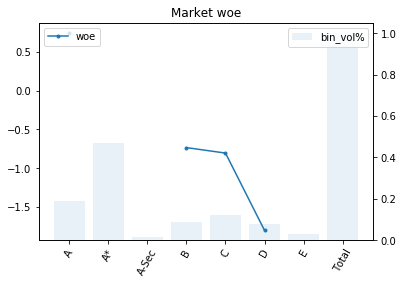

feat  N_good  N_bad  feat_num_index  N_count  dist_good  dist_bad  \
0      A   172.0    1.0             NaN    173.0   0.192179  0.090909   
1     A*   425.0    0.0             NaN    425.0   0.474860  0.000000   
2  A-Sec    15.0    0.0             NaN     15.0   0.016760  0.000000   
3      B    78.0    2.0             NaN     80.0   0.087151  0.181818   
4      C   109.0    3.0             NaN    112.0   0.121788  0.272727   
5      D    67.0    5.0             NaN     72.0   0.074860  0.454545   
6      E    29.0    0.0             NaN     29.0   0.032402  0.000000   
7  Total   895.0   11.0             NaN    906.0   1.000000  1.000000   

   bin_count_perc       woe   logodds     p_bad        iv     var       desc  
0        0.190949  0.748566  5.147494  0.005780  0.075807  Market  Fineclass  
1        0.469095       NaN       NaN  0.000000       NaN  Market  Fineclass  
2        0.016556       NaN       NaN  0.000000       NaN  Market  Fineclass  
3        0.088300 -0.735367  3.663562  0.025000  0.069615  Market  Fineclass  
4        0.123620 -0.806193  3.592736  0.026786  0.121686  Market  Fineclass  
5        0.079470 -1.803674  2.595255  0.069444  0.684828  Market  Fineclass  
6        0.032009       NaN       NaN  0.000000       NaN  Market  Fineclass  
7        1.000000       NaN       NaN       NaN  0.951937  Market  Fineclass

In [13]:
# var = 'Loan_purpose'
var = 'Market'

target = 'target'

#Fine class
s_num, s_cat = logreg_binning.split_num_cat(df[var])

s_num_fc, num_bin_edges_fc = logreg_binning.num_fc(s_num, bin_num_fineclass =20)
print('{} rows in s_num \n{} rows in s_cat'.format(len(s_num), len(s_cat)))
print('num bin edges: ', num_bin_edges_fc)

s_cat_fc, cat_bin_values_fc = logreg_binning.cat_fc(s_cat)
print('cat values: ', cat_bin_values_fc)

s_fc = logreg_binning.combine_num_cat_fc(s_num_fc, s_cat_fc)

eval_df_summary_fc = logreg_binning.bin_woe_iv(s_fc, df[target])

eval_df_summary_fc

#### STEP 2 - COARSECLASS and EVALUATION

input bin groups  [[0, 1, 2], [3, 4], [5, 6]]
output bin values  ['A, A*, A-Sec' 'B, C' 'D, E']
Custom Coarseclass - group categorical bins
IV is 1.888717960966924
total number of rows match


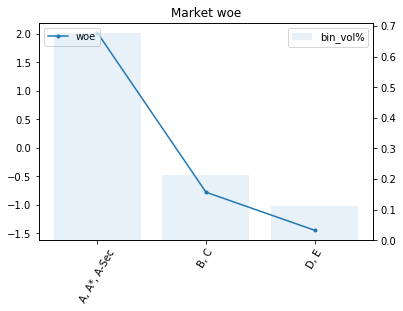

feat  N_good  N_bad  feat_num_index  N_count  dist_good  dist_bad  \
0  A, A*, A-Sec   612.0    1.0             NaN    613.0   0.683799  0.090909   
1          B, C   187.0    5.0             NaN    192.0   0.208939  0.454545   
2          D, E    96.0    5.0             NaN    101.0   0.107263  0.454545   

   bin_count_perc       woe   logodds     p_bad        iv  
0        0.676600  2.017804  6.416732  0.001631  1.196335  
1        0.211921 -0.777258  3.621671  0.026042  0.190900  
2        0.111479 -1.444018  2.954910  0.049505  0.501483

In [11]:
# Categorical coarse classing - Manual group categorical bins (Recommended for features with <10 bins)
s_cat_cc, cat_bin_values_cc = logreg_binning.cat_cc(s_cat, cat_bin_values = cat_bin_values_fc, \
                                                            cat_bin_values_groups = [[0, 1, 2], [3, 4], [5, 6]])

s_cc = logreg_binning.combine_num_cat_fc(s_num_fc, s_cat_cc)

eval_df_summary_cc = logreg_binning.bin_woe_iv(s_cc, df[target], desc = 'Custom Coarseclass - group categorical bins')

eval_df_summary_cc

### Example of smoothing woe for zero bad bin (Recommended for high cardinality features)

0 rows in s_num 
906 rows in s_cat
num bin edges:  []
cat values:  ['Business purposes' 'Car' 'Caravan' 'Consolidate existing debts'
 'Electronic goods (eg. Computer, TV, Audio)' 'Holiday'
 'Home improvements' 'House deposit' 'Motorbike' 'Other'
 'Pay off credit cards' 'Pay off loan from relative or friend' 'Repairs'
 'Tax bill' 'Wedding expenses']
Fineclass
IV is 0.45448044698647727
total number of rows match


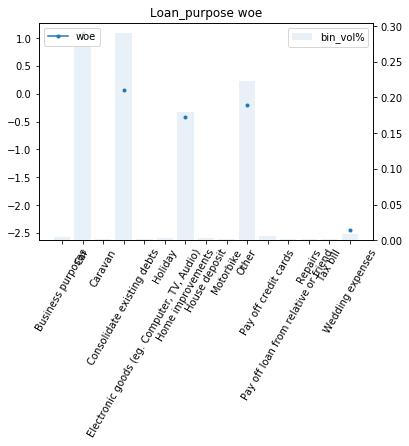

feat  N_good  N_bad  feat_num_index  \
0                            Business purposes     4.0    0.0             NaN   
1                                          Car   244.0    1.0             NaN   
2                                      Caravan     1.0    0.0             NaN   
3                   Consolidate existing debts   260.0    3.0             NaN   
4   Electronic goods (eg. Computer, TV, Audio)     2.0    0.0             NaN   
5                                      Holiday     3.0    0.0             NaN   
6                            Home improvements   160.0    3.0             NaN   
7                                House deposit     3.0    0.0             NaN   
8                                    Motorbike     2.0    0.0             NaN   
9                                        Other   199.0    3.0             NaN   
10                        Pay off credit cards     5.0    0.0             NaN   
11        Pay off loan from relative or friend     2.0    0.0             NaN   
12                                     Repairs     2.0    0.0             NaN   
13                                    Tax bill     1.0    0.0             NaN   
14                            Wedding expenses     7.0    1.0             NaN   

    N_count  dist_good  dist_bad  bin_count_perc       woe   logodds  \
0       4.0   0.004469  0.000000        0.004415  0.000000       NaN   
1     245.0   0.272626  0.090909        0.270419  1.098240  5.497168   
2       1.0   0.001117  0.000000        0.001104  0.000000       NaN   
3     263.0   0.290503  0.272727        0.290287  0.063141  4.462069   
4       2.0   0.002235  0.000000        0.002208  0.000000       NaN   
5       3.0   0.003352  0.000000        0.003311  0.000000       NaN   
6     163.0   0.178771  0.272727        0.179912 -0.422367  3.976562   
7       3.0   0.003352  0.000000        0.003311  0.000000       NaN   
8       2.0   0.002235  0.000000        0.002208  0.000000       NaN   
9     202.0   0.222346  0.272727        0.222958 -0.204236  4.194693   
10      5.0   0.005587  0.000000        0.005519  0.000000       NaN   
11      2.0   0.002235  0.000000        0.002208  0.000000       NaN   
12      2.0   0.002235  0.000000        0.002208  0.000000       NaN   
13      1.0   0.001117  0.000000        0.001104  0.000000       NaN   
14      8.0   0.007821  0.090909        0.008830 -0.567813  1.945910   

       p_bad        iv  smoothing_factor  
0   0.000000       NaN          0.167982  
1   0.004082  0.199568          1.000000  
2   0.000000       NaN          0.130108  
3   0.011407  0.001122          1.000000  
4   0.000000       NaN          0.141851  
5   0.000000       NaN          0.154465  
6   0.018405  0.039684          0.999999  
7   0.000000       NaN          0.154465  
8   0.000000       NaN          0.141851  
9   0.014851  0.010290          1.000000  
10  0.000000       NaN          0.182426  
11  0.000000       NaN          0.141851  
12  0.000000       NaN          0.141851  
13  0.000000       NaN          0.130108  
14  0.125000  0.203816          0.231475

In [12]:
var = 'Loan_purpose'
# var = 'Market'

target = 'target'

#Fine class
s_num, s_cat = logreg_binning.split_num_cat(df[var])

s_num_fc, num_bin_edges_fc = logreg_binning.num_fc(s_num, bin_num_fineclass =20)
print('{} rows in s_num \n{} rows in s_cat'.format(len(s_num), len(s_cat)))
print('num bin edges: ', num_bin_edges_fc)

s_cat_fc, cat_bin_values_fc = logreg_binning.cat_fc(s_cat)
print('cat values: ', cat_bin_values_fc)

s_fc = logreg_binning.combine_num_cat_fc(s_num_fc, s_cat_fc)

eval_df_summary_fc = logreg_binning.bin_woe_iv(s_fc, df[target])
    
eval_df_summary_cc = logreg_binning.cc_cat_zerobad_lowvolwoesmooth(cat_bin_values = cat_bin_values_fc, \
                                                                           eval_df_summary = eval_df_summary_fc, \
                                                                           min_samples_leaf=20, smoothing=10)
eval_df_summary_cc

#### STEP 3 - WOE ENCODING based on COARSECLASS

In [13]:
#for high cardinality feature, s_cc is not created and changes were only made to woe. so assign s_fc to s_cc
if s_cc is None or s_cc.name!=var:
    s_cc = s_fc

#convert s_cc to woe
s_cc_woe = logreg_binning.cc_to_woe(s_cc, eval_df_summary_cc)

s_cc_woe

woe encoding {'Business purposes': 0.0, 'Car': 1.098239779630906, 'Caravan': 0.0, 'Consolidate existing debts': 0.06314089686916755, 'Electronic goods (eg. Computer, TV, Audio)': 0.0, 'Holiday': 0.0, 'Home improvements': -0.42236665872799517, 'House deposit': 0.0, 'Motorbike': 0.0, 'Other': -0.20423590687343302, 'Pay off credit cards': 0.0, 'Pay off loan from relative or friend': 0.0, 'Repairs': 0.0, 'Tax bill': 0.0, 'Wedding expenses': -0.5678129412449616}


0     -0.204236
1     -0.204236
2      1.098240
3     -0.422367
4     -0.204236
         ...   
901    0.063141
902    0.063141
903    1.098240
904    0.063141
905    0.063141
Name: Loan_purpose_woe, Length: 906, dtype: float64

### Example of numeric variable

#### STEP 1 - FINECLASS and EVALUATION

num of bins is  16
906 rows in s_num 
0 rows in s_cat
num bin edges:  [-0.001   0.0674  0.0832  0.0936  0.109   0.125   0.141   0.158   0.174
  0.195   0.211   0.228   0.245   0.299   0.37    0.535   1.    ]
cat values:  []
Fineclass
IV is 1.8142556302368862
total number of rows match


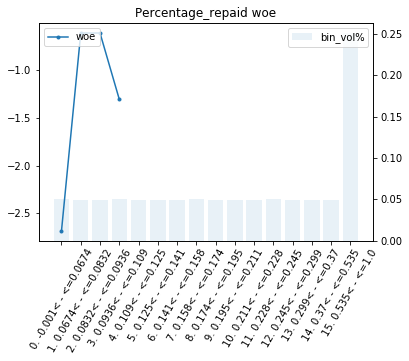

feat  N_good  N_bad  feat_num_index  N_count  dist_good  \
0   0. -0.001< - <=0.0674    39.0    7.0               0     46.0   0.043575   
1   1. 0.0674< - <=0.0832    44.0    1.0               1     45.0   0.049162   
2   2. 0.0832< - <=0.0936    44.0    1.0               2     45.0   0.049162   
3    3. 0.0936< - <=0.109    44.0    2.0               3     46.0   0.049162   
4     4. 0.109< - <=0.125    45.0    0.0               4     45.0   0.050279   
5     5. 0.125< - <=0.141    45.0    0.0               5     45.0   0.050279   
6     6. 0.141< - <=0.158    45.0    0.0               6     45.0   0.050279   
7     7. 0.158< - <=0.174    46.0    0.0               7     46.0   0.051397   
8     8. 0.174< - <=0.195    45.0    0.0               8     45.0   0.050279   
9     9. 0.195< - <=0.211    45.0    0.0               9     45.0   0.050279   
10   10. 0.211< - <=0.228    45.0    0.0              10     45.0   0.050279   
11   11. 0.228< - <=0.245    46.0    0.0              11     46.0   0.051397   
12   12. 0.245< - <=0.299    45.0    0.0              12     45.0   0.050279   
13    13. 0.299< - <=0.37    45.0    0.0              13     45.0   0.050279   
14    14. 0.37< - <=0.535    45.0    0.0              14     45.0   0.050279   
15     15. 0.535< - <=1.0   227.0    0.0              15    227.0   0.253631   

    dist_bad  bin_count_perc       woe   logodds     p_bad        iv  
0   0.636364        0.050773 -2.681277  1.717651  0.152174  1.589429  
1   0.090909        0.049669 -0.614739  3.784190  0.022222  0.025664  
2   0.090909        0.049669 -0.614739  3.784190  0.022222  0.025664  
3   0.181818        0.050773 -1.307886  3.091042  0.043478  0.173499  
4   0.000000        0.049669       NaN       NaN  0.000000       NaN  
5   0.000000        0.049669       NaN       NaN  0.000000       NaN  
6   0.000000        0.049669       NaN       NaN  0.000000       NaN  
7   0.000000        0.050773       NaN       NaN  0.000000       NaN  
8   0.000000        0.049669       NaN       NaN  0.000000       NaN  
9   0.000000        0.049669       NaN       NaN  0.000000       NaN  
10  0.000000        0.049669       NaN       NaN  0.000000       NaN  
11  0.000000        0.050773       NaN       NaN  0.000000       NaN  
12  0.000000        0.049669       NaN       NaN  0.000000       NaN  
13  0.000000        0.049669       NaN       NaN  0.000000       NaN  
14  0.000000        0.049669       NaN       NaN  0.000000       NaN  
15  0.000000        0.250552       NaN       NaN  0.000000       NaN

In [14]:
# var = 'Borrower_rate'
# var = 'Transaction_price'
# var = 'Market'
# var = 'Days_in_arrears'
var = 'Percentage_repaid'
target = 'target'

s_num, s_cat = logreg_binning.split_num_cat(df[var])

s_num_fc, num_bin_edges_fc = logreg_binning.num_fc(s_num, bin_num_fineclass =20)
print('{} rows in s_num \n{} rows in s_cat'.format(len(s_num), len(s_cat)))
print('num bin edges: ', num_bin_edges_fc)

s_cat_fc, cat_bin_values_fc = logreg_binning.cat_fc(s_cat)
print('cat values: ', cat_bin_values_fc)

s_fc = logreg_binning.combine_num_cat_fc(s_num_fc, s_cat_fc)

eval_df_summary_fc = logreg_binning.bin_woe_iv(s_fc, df[target])
eval_df_summary_fc

#### STEP 2 - COARSECLASS and EVALUATION

Coarseclass Group 0 Bad bins
IV is 2.6901533874172134
total number of rows match


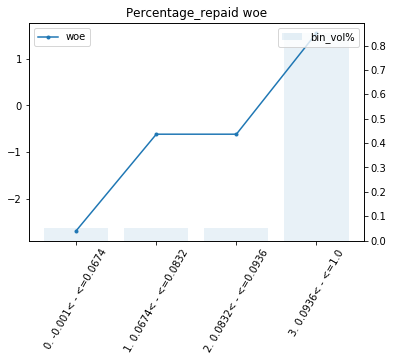

feat  N_good  N_bad  feat_num_index  N_count  dist_good  \
0  0. -0.001< - <=0.0674    39.0    7.0               0     46.0   0.043575   
1  1. 0.0674< - <=0.0832    44.0    1.0               1     45.0   0.049162   
2  2. 0.0832< - <=0.0936    44.0    1.0               2     45.0   0.049162   
3     3. 0.0936< - <=1.0   768.0    2.0               3    770.0   0.858101   

   dist_bad  bin_count_perc       woe   logodds     p_bad        iv  
0  0.636364        0.050773 -2.681277  1.717651  0.152174  1.589429  
1  0.090909        0.049669 -0.614739  3.784190  0.022222  0.025664  
2  0.090909        0.049669 -0.614739  3.784190  0.022222  0.025664  
3  0.181818        0.849890  1.551714  5.950643  0.002597  1.049397

In [15]:
# Numeric coarse classing - group 0 Bad bins
num_bin_edges_cc = logreg_binning.num_cc_edges_nonzerobad(s_num, num_bin_edges_fc, eval_df_summary_fc)
s_num_cc = logreg_binning.num_cc(s_num, num_bin_edges_cc)

s_cc = logreg_binning.combine_num_cat_fc(s_num_cc, s_cat_fc)

eval_df_summary_cc = logreg_binning.bin_woe_iv(s_cc, df[target], desc = 'Coarseclass Group 0 Bad bins')
eval_df_summary_cc

feature and target correlation is -0.10136656807414093, woe should increase as feature increase
input bin edges :  [-0.001   0.0674  0.0832  0.0936  1.    ] 
 dropping index [2]
output bin edges :  [-0.001   0.0674  0.0936  1.    ]
Automatic Coarseclass group non-monotonic bins
IV is 2.690153387417213
total number of rows match


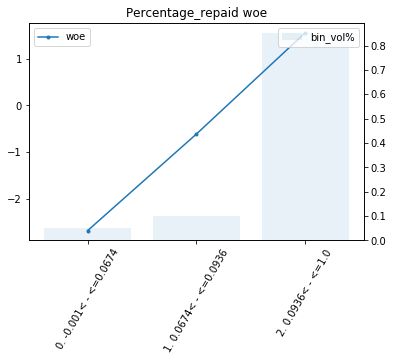

feat  N_good  N_bad  feat_num_index  N_count  dist_good  \
0  0. -0.001< - <=0.0674    39.0    7.0               0     46.0   0.043575   
1  1. 0.0674< - <=0.0936    88.0    2.0               1     90.0   0.098324   
2     2. 0.0936< - <=1.0   768.0    2.0               2    770.0   0.858101   

   dist_bad  bin_count_perc       woe   logodds     p_bad        iv  
0  0.636364        0.050773 -2.681277  1.717651  0.152174  1.589429  
1  0.181818        0.099338 -0.614739  3.784190  0.022222  0.051327  
2  0.181818        0.849890  1.551714  5.950643  0.002597  1.049397

In [16]:
# Numeric coarse classing - Automatic group non-monotonic bins
num_bin_edges_cc = logreg_binning.num_cc_edges_woe_enforce_monotonicity(s_num, df[target], num_bin_edges = num_bin_edges_cc, eval_df_summary = eval_df_summary_cc)

s_num_cc = logreg_binning.num_cc(s_num, num_bin_edges_cc)

s_cc = logreg_binning.combine_num_cat_fc(s_num_cc, s_cat_fc)

eval_df_summary_cc = logreg_binning.bin_woe_iv(s_cc, df[target], desc = 'Automatic Coarseclass group non-monotonic bins')

eval_df_summary_cc

feature and target correlation is -0.10136656807414093, woe should increase as feature increase
input bin edges :  [-0.001   0.0674  0.0936  1.    ] 
 dropping index []
output bin edges :  [-0.001   0.0674  0.0936  1.    ]
Automatic Coarseclass group non-monotonic bins
IV is 2.690153387417213
total number of rows match


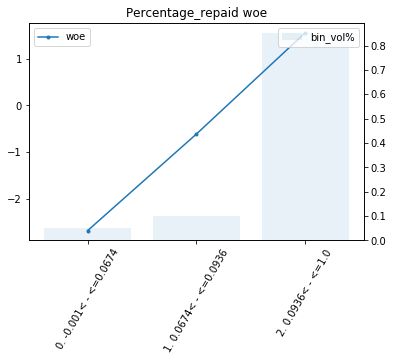

feat  N_good  N_bad  feat_num_index  N_count  dist_good  \
0  0. -0.001< - <=0.0674    39.0    7.0               0     46.0   0.043575   
1  1. 0.0674< - <=0.0936    88.0    2.0               1     90.0   0.098324   
2     2. 0.0936< - <=1.0   768.0    2.0               2    770.0   0.858101   

   dist_bad  bin_count_perc       woe   logodds     p_bad        iv  
0  0.636364        0.050773 -2.681277  1.717651  0.152174  1.589429  
1  0.181818        0.099338 -0.614739  3.784190  0.022222  0.051327  
2  0.181818        0.849890  1.551714  5.950643  0.002597  1.049397

In [17]:
# Numeric coarse classing - Automatic group non-monotonic bins - Round 2
num_bin_edges_cc = logreg_binning.num_cc_edges_woe_enforce_monotonicity(s_num, df[target], num_bin_edges = num_bin_edges_cc, eval_df_summary = eval_df_summary_cc)

s_num_cc = logreg_binning.num_cc(s_num, num_bin_edges_cc)

s_cc = logreg_binning.combine_num_cat_fc(s_num_cc, s_cat_fc)

eval_df_summary_cc = logreg_binning.bin_woe_iv(s_cc, df[target], desc = 'Automatic Coarseclass group non-monotonic bins')

eval_df_summary_cc

input bin edges :  [-0.001   0.0674  0.0936  1.    ] 
 dropping  [0.0936]
output bin edges :  [-0.001   0.0674  1.    ]
Manual Coarseclass group non-monotonic bins
IV is 2.1626837873785387
total number of rows match


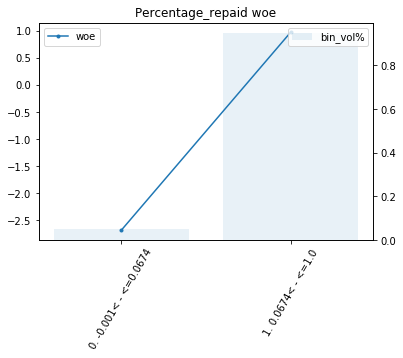

feat  N_good  N_bad  feat_num_index  N_count  dist_good  \
0  0. -0.001< - <=0.0674    39.0    7.0               0     46.0   0.043575   
1     1. 0.0674< - <=1.0   856.0    4.0               1    860.0   0.956425   

   dist_bad  bin_count_perc       woe   logodds     p_bad        iv  
0  0.636364        0.050773 -2.681277  1.717651  0.152174  1.589429  
1  0.363636        0.949227  0.967048  5.365976  0.004651  0.573254

In [18]:
# Numeric coarse classing - Manual group non-monotonic bins
num_bin_edges_cc = logreg_binning.num_cc_edges_custom(num_bin_edges_cc, [[1, 2]])

s_num_cc = logreg_binning.num_cc(s_num, num_bin_edges_cc)

s_cc = logreg_binning.combine_num_cat_fc(s_num_cc, s_cat_fc)

eval_df_summary_cc = logreg_binning.bin_woe_iv(s_cc, df[target], desc = 'Manual Coarseclass group non-monotonic bins')

eval_df_summary_cc

#### STEP 3 - WOE ENCODING based on COARSECLASS

In [19]:
s_cc = logreg_binning.combine_num_cat_fc(s_num_cc, s_cat_fc)

s_cc_woe = logreg_binning.cc_to_woe(s_cc, eval_df_summary_cc)

s_cc_woe

woe encoding {'0. -0.001< - <=0.0674': -2.6812769484021515, '1. 0.0674< - <=1.0': 0.9670475695453666}


0     -2.681277
1      0.967048
2      0.967048
3     -2.681277
4     -2.681277
         ...   
901    0.967048
902    0.967048
903   -2.681277
904   -2.681277
905   -2.681277
Name: Percentage_repaid_woe, Length: 906, dtype: float64